In [1]:
include("MC.jl")

include("viz.jl");

In [2]:
ENV["COLUMNS"] = 200
const N = 30;

### EUR cities

In [4]:
cities = ["Nicosia", "Valletta", "Athens", "Madrid", "Thessaloniki", "Rome", "Bucharest",
          "Ljubljana", "Paris", "Kyiv", "Warsaw", "Berlin", "Dublin", "Copenhagen", 
          "Moscow","Riga", "Stockholm", "Helsinki", "Bergen", "Reykjavik", "Älvsbyn"];

CMFs = [0.84, 0.84, 0.78, 0.78, 0.74, 0.78, 0.68,
        0.66, 0.64, 0.64, 0.62, 0.62, 0.64, 0.63, 
        0.58, 0.62, 0.63, 0.57, 0.59, 0.51, 0.59];

df = DataFrame(:city=>cities, :cmf=>CMFs)

df1 = sort!(df, :cmf, rev=true);

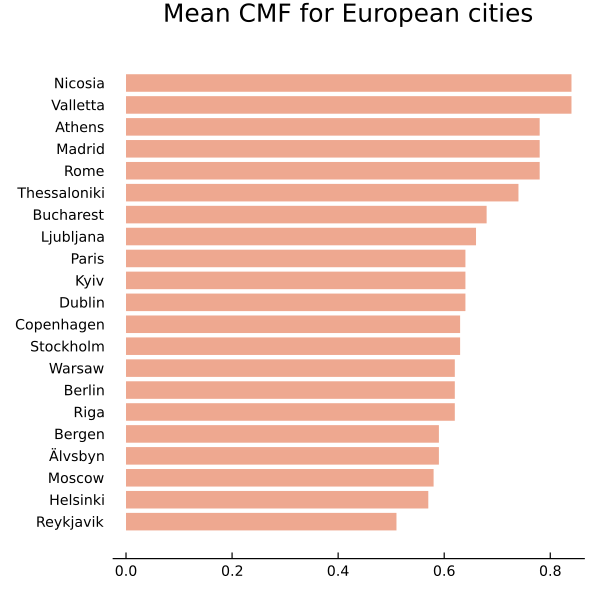

In [5]:
b1 = bar(df1.city, df1.cmf, leg=false, orientation=:horizontal, 
    lw=0, w=0, c=2, alpha=0.6, size=(500, 500), 
    grid=false, yflip=true, yaxis=false, yticks=(0.5:1:21.4, df1.city),
    title="Mean CMF for European cities")

In [5]:
fn_athens = "irradiation_Athens.nc"
fn_bucharest = "irradiation_Bucharest.nc"
fn_berlin = "irradiation_Berlin.nc"
fn_helsinki = "irradiation_Helsinki.nc";

### transition matrix

In [4]:
function get_tranMat(fn)
    data_train, data_test = getCMF(fn; raw=0)
    data_train_cls, binStarts, binMean = getBins(data_train, N) 
    data_test_cls = classify(data_test, binStarts)
    
    df21 = getDF(2, 1, N, data_train_cls, data_test, data_test_cls, binStarts, binMean)
    s_t_2 = df21.pers_cls
    s_t_1 = df21.real_cls
    pred = df21.pred;

    T, T_ct = zeros(N, N), zeros(N, N)
    len = length(pred)
    for i in 1:len-1
        T[s_t_2[i], s_t_1[i]] += pred[i+1]
        T_ct[s_t_2[i], s_t_1[i]] += 1
    end
    T_test = T ./ T_ct
    return binMean, T_test
end

get_tranMat (generic function with 1 method)

In [5]:
binMean_at, T_at = get_tranMat(fn_athens)

([0.19201971761868297, 0.26120676192501346, 0.3170561083443486, 0.37345917459775946, 0.4339303066233101, 0.5037977204413084, 0.5857750666761027, 0.6603870717021594, 0.7146948046941743, 0.7633274446536069  …  0.9521320722877832, 0.9535568936969921, 0.9552510706827709, 0.9571121958740532, 0.9593424773059507, 0.9622716138982916, 0.9670106373366416, 0.974728543502648, 0.9891116135703609, 1.0], [0.226632981719192 0.3621800569804525 … NaN NaN; 0.2414612298740387 0.3107512195810851 … NaN NaN; … ; 0.19201971761868297 0.27237663120888045 … 0.9826468463519155 NaN; NaN NaN … NaN NaN])

In [6]:
binMean_bu, T_bu = get_tranMat(fn_bucharest)

binMean_be, T_be = get_tranMat(fn_berlin)

binMean_he, T_he = get_tranMat(fn_helsinki);

In [8]:
ticks_at = rd.(binMean_at, 2)
xti_at = (binMean_at[[1:2:15; 25; 30]], ticks_at[[1:2:15; 25; 30]])

ticks_bu = rd.(binMean_bu, 2)
xti_bu = (binMean_bu[[1:2:24; 30]], ticks_bu[[1:2:24; 30]])

ticks_be = rd.(binMean_be, 2)
xti_be = (binMean_be[[1:2:26; 30]], ticks_be[[1:2:26; 30]])

ticks_he = rd.(binMean_he, 2)
xti_he = (binMean_he[[1:2:28; 30]], ticks_he[[1:2:28; 30]])

([0.052802522164755526, 0.18607846930125493, 0.28272625089643466, 0.3584197800405555, 0.4271584995811181, 0.5008453342429054, 0.5768235993480554, 0.6443496293246972, 0.7111089850532942, 0.7733712595164653, 0.8218776216886204, 0.8619668134995326, 0.9047806162886182, 0.9419830231459244, 0.9835951367237871], [0.05, 0.19, 0.28, 0.36, 0.43, 0.5, 0.58, 0.64, 0.71, 0.77, 0.82, 0.86, 0.9, 0.94, 0.98])

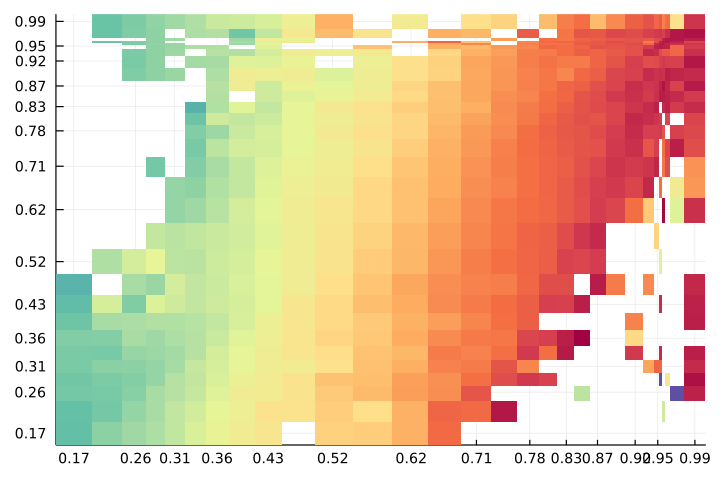

In [9]:
hm_at = heatmap(binMean_at, binMean_at, T_at, c=cgrad(:Spectral_10, rev=true), clim=(0,1), leg=:none,
    xticks=xti_at, yticks=xti_at)

hm_bu = heatmap(binMean_bu, binMean_bu, T_bu, c=cgrad(:Spectral_10, rev=true), clim=(0,1),  leg=:none,
    xticks=xti_bu, yticks=xti_bu)

hm_be = heatmap(binMean_be, binMean_be, T_be, c=cgrad(:Spectral_10, rev=true), clim=(0,1),  leg=:none,
    xticks=xti_be, yticks=xti_be);

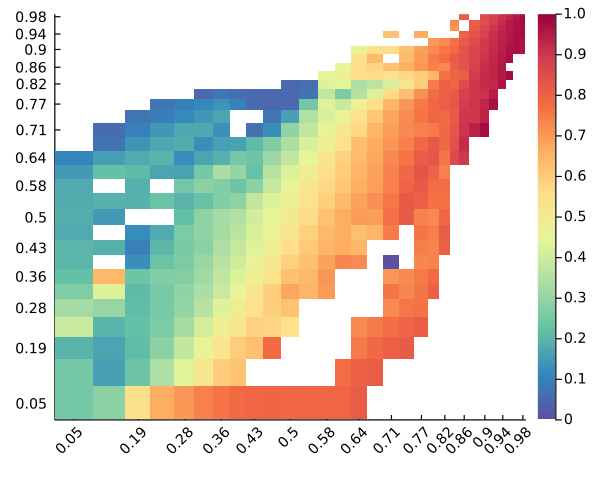

In [155]:
hm_he = heatmap(binMean_he, binMean_he, T_he, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, xrotation=45, size=(500,400), #leg=:none,
    xticks=xti_he, yticks=xti_he)

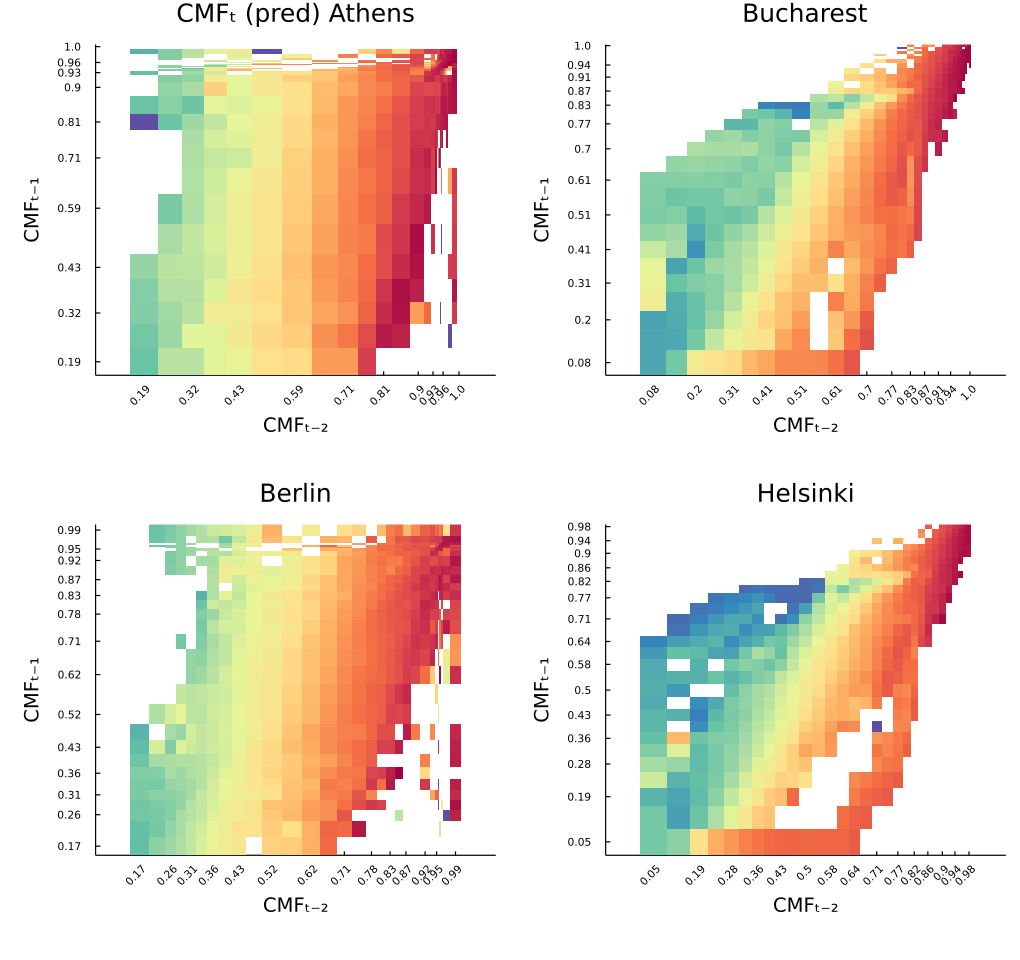

In [154]:
p = plot(hm_at, hm_bu, hm_be, hm_he, layout=@layout([a b; c d]), grid=false, size=(850, 800), 
        title=["CMFₜ (pred) Athens" "Bucharest" "Berlin" "Helsinki"], xrotation=45, aspect_ratio=1,
        xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", leftmargin=20px, bottommargin=20px, tickfontsize=6)

In [13]:
df22 = getDF(2, 2, N)

17935×14 DataFrame
   Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred      dif_cls_pred  pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64       Int64         Float64   Int64       Float64      Int64          
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.841421        12  0.389299         4  -0.452122              -8  0.49599          6  -0.34543                -6  0.564615           7  -0.276806                -5
     2 │ 0.77269         10  0.725234         9  -0.0474562             -1  0.735315         9  -0.0373752              -1  0.717158           9  -0.0555324               -1
     3 │ 0.303627         3  0.841421        12   0.537794               9  0.842306        12   0.53868                 9  0.833206          12   0.529579                 9
     4 │ 0.191245         1  0.77269         10   0.581445               9  0.737132         9   0.545887                8  0.709775           9   0.51853                  8
     5 │ 0.306435         3  0.303627         3  -0.00280823             0  0.334387         3   0.0279517               0  0.360152           4   0.0537173                1
     6 │ 0.288095         2  0.191245         1  -0.0968499             -1  0.267708         2  -0.020387                0  0.36218            4   0.0740851                2
     7 │ 0.256549         2  0.306435         3   0.049886               1  0.361413         4   0.104864                2  0.495484           6   0.238935                 4
     8 │ 0.229625         1  0.288095         2   0.0584704              1  0.316244         3   0.0866196               2  0.433991           5   0.204366                 4
     9 │ 0.22068          1  0.256549         2   0.0358689              1  0.310751         3   0.0900711               2  0.433991           5   0.213311                 4
    10 │ 0.18659          1  0.229625         1   0.0430345              0  0.241461         2   0.0548712               1  0.36218            4   0.17559                  3
    11 │ 0.217646         1  0.22068          1   0.00303411             0  0.226633         1   0.00898698              0  0.226633           1   0.00898698               0
   ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮             ⋮           ⋮          ⋮            ⋮             ⋮
 17926 │ 0.550436         7  0.40426          5  -0.146175              -2  0.522433         6  -0.0280032              -1  0.553984           7   0.00354848               0
 17927 │ 0.557637         7  0.441669         5  -0.115968              -2  0.475439         6  -0.0821986              -1  0.553984           7  -0.00365288               0
 17928 │ 0.621381         7  0.550436         7  -0.0709452              0  0.621859         7   0.000477624             0  0.599816           7  -0.0215646                0
 17929 │ 0.698062         9  0.557637         7  -0.140425              -2  0.599816         7  -0.0982454              -2  0.599816           7  -0.0982454               -2
 17930 │ 0.632632         8  0.621381         7  -0.0112511             -1  0.599816         7  -0.0328157              -1  0.599816           7  -0.0328157               -1
 17931 │ 0.605522         7  0.698062         9   0.0925401              2  0.73197          9   0.126449                2  0.717158           9   0.111636                 2
 17932 │ 0.877365        13  0.632632         8  -0.244733              -5  0.665499         8  -0.211866               -5  0.66383            8  -0.213535                -5
 17933 │ 0.898045        13  0.605522         7  -0.292523              -6  0.590716         7  -0.307329               -6  0.599816           7  -0.298229  

### performance stats

In [7]:
function get_df_city(fn, steps; hyb=0) 
    data_train, data_test = getCMF(fn; raw=0)
    data_train_cls, binStarts, binMean = getBins(data_train, N) 
    data_test_cls = classify(data_test, binStarts)    
    df = getDF(2, steps, N, data_train_cls, data_test, data_test_cls, binStarts, binMean)
    if hyb == 1
        return hybrid(df, steps)
    else
        return df
    end
end

get_df_city (generic function with 1 method)

In [63]:
df21_at = get_df_city(fn_athens, 1; hyb=1)

8968×16 DataFrame
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    dif_hyb_r   
      │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64      Int64         Int64    Float64   Int64     Float64   Float64      Float64     
──────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.841421        12  0.725234         9  -0.116186              -3  0.735315         9  -0.106105              -3        2  0.735315         2  0.735315  -0.106105    -0.106105
    2 │ 0.303627         3  0.77269         10   0.469064               7  0.737132         9   0.433505               6        1  0.77269          1  0.77269    0.469064     0.469064
    3 │ 0.306435         3  0.191245         1  -0.11519               -2  0.267708         2  -0.038727              -1        1  0.191245         1  0.191245  -0.11519     -0.11519
    4 │ 0.256549         2  0.288095         2   0.031546               0  0.316244         3   0.0596952              1        1  0.288095         2  0.316244   0.031546     0.0596952
    5 │ 0.22068          1  0.229625         1   0.00894446             0  0.241461         2   0.0207811              1        1  0.229625         1  0.229625   0.00894446   0.00894446
    6 │ 0.217646         1  0.18659          1  -0.0310559              0  0.226633         1   0.00898698             0        1  0.18659          1  0.18659   -0.0310559   -0.0310559
    7 │ 0.215674         1  0.25662          2   0.0409451              1  0.36218          4   0.146506               3        1  0.25662          1  0.25662    0.0409451    0.0409451
    8 │ 0.292217         3  0.259827         2  -0.03239               -1  0.36218          4   0.0699626              1        1  0.259827         1  0.259827  -0.03239     -0.03239
    9 │ 0.306803         3  0.341479         3   0.0346769              0  0.360152         4   0.0533498              1        1  0.341479         1  0.341479   0.0346769    0.0346769
   10 │ 0.298242         3  0.232704         2  -0.0655378             -1  0.316244         3   0.018002               0        1  0.232704         1  0.232704  -0.0655378   -0.0655378
   11 │ 0.307722         3  0.339112         3   0.0313903              0  0.360152         4   0.0524301              1        1  0.339112         1  0.339112   0.0313903    0.0313903
  ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮           ⋮        ⋮         ⋮         ⋮           ⋮            ⋮
 8959 │ 0.241602         2  0.316709         3   0.0751063              1  0.433991         5   0.192388               3        1  0.316709         2  0.433991   0.0751063    0.192388
 8960 │ 0.232634         2  0.189528         1  -0.0431063             -1  0.241461         2   0.00882739             0        1  0.189528         2  0.241461  -0.0431063    0.00882739
 8961 │ 0.30506          3  0.307376         3   0.00231605             0  0.433991         5   0.128931               2        1  0.307376         1  0.307376   0.00231605   0.00231605
 8962 │ 0.366657         4  0.356983         4  -0.0096738              0  0.495484         6   0.128827               2        1  0.356983         2  0.495484  -0.0096738    0.128827
 8963 │ 0.441669         5  0.40426          5  -0.037409               0  0.522433         6   0.0807633              1        1  0.40426          2  0.522433  -0.037409     0.0807633
 8964 │ 0.557637         7  0.550436         7  -0.00720136             0  0.621859         7   0.0642215              0        2  0.621859         2  0.621859   0.0642215    0.0642215
 8965 │ 0.698062         9  0.621381         7  -0.0766808             -2  0.599816         7  -0.09

In [42]:
df22_at = get_df_city(fn_athens, 2; hyb=1)

8967×20 DataFrame
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred      dif_cls_pred  pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n  mae_min  hyb_m     rmse_ ⋯
      │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64       Int64         Float64   Int64       Float64      Int64           Int64    Float64   Int64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.77269         10  0.725234         9  -0.0474562             -1  0.735315         9  -0.0373752              -1  0.717158           9  -0.0555324               -1        3  0.717158        ⋯
    2 │ 0.191245         1  0.77269         10   0.581445               9  0.737132         9   0.545887                8  0.709775           9   0.51853                  8        1  0.77269
    3 │ 0.288095         2  0.191245         1  -0.0968499             -1  0.267708         2  -0.020387                0  0.36218            4   0.0740851                2        1  0.191245
    4 │ 0.229625         1  0.288095         2   0.0584704              1  0.316244         3   0.0866196               2  0.433991           5   0.204366                 4        1  0.288095
    5 │ 0.18659          1  0.229625         1   0.0430345              0  0.241461         2   0.0548712               1  0.36218            4   0.17559                  3        1  0.229625        ⋯
    6 │ 0.25662          2  0.18659          1  -0.0700295             -1  0.226633         1  -0.0299866              -1  0.226633           1  -0.0299866               -1        1  0.18659
    7 │ 0.259827         2  0.25662          2  -0.00320779             0  0.36218          4   0.102353                2  0.433627           5   0.1738                   3        1  0.25662
    8 │ 0.341479         3  0.259827         2  -0.081652              -1  0.36218          4   0.0207007               1  0.433627           5   0.092148                 2        1  0.259827
    9 │ 0.232704         2  0.341479         3   0.108775               1  0.360152         4   0.127448                2  0.495484           6   0.26278                  4        1  0.341479        ⋯
   10 │ 0.339112         3  0.232704         2  -0.106408              -1  0.316244         3  -0.0228683               0  0.433991           5   0.0948782                2        1  0.232704
   11 │ 0.258262         2  0.339112         3   0.0808501              1  0.360152         4   0.10189                 2  0.495484           6   0.237222                 4        1  0.339112
  ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮             ⋮           ⋮          ⋮            ⋮             ⋮            ⋮        ⋮         ⋮  ⋱
 8958 │ 0.316709         3  0.383084         4   0.0663752              1  0.420232         5   0.103523                2  0.522433           6   0.205724                 3        1  0.383084
 8959 │ 0.189528         1  0.316709         3   0.127181               2  0.433991         5   0.244463                4  0.484662           6   0.295135                 5        1  0.316709        ⋯
 8960 │ 0.307376         3  0.189528         1  -0.117848              -2  0.241461         2  -0.0659144              -1  0.36218            4   0.0548044                1        1  0.189528
 8961 │ 0.356983         4  0.307376         3  -0.0496074             -1  0.433991         5   0.0770076               1  0.484662           6   0.127679                 2        2  0.433991
 8962 │ 0.40426          5  0.356983         4  -0.0472773             -1  0.495484         6   0.0912239               1  0.564615           7   0.160355                 2        2  0.495484
 8963 │ 0.550436         7  0.40426          5  -0.146175              -2

#### test Athens

In [10]:
df21_at = get_df_city(fn_athens, 1)
df1 = df21_at[:,[1, 3, 7]]

In [67]:
df22_at = get_df_city(fn_athens, 2)

In [69]:
df2 = df22_at[:,[1, 3, 7, 11, 16, 18]]

8967×6 DataFrame
  Row │ real      pers      pred      pred_n    hyb_m     hyb_r    
      │ Float64   Float64   Float64   Float64   Float64   Float64  
──────┼────────────────────────────────────────────────────────────
    1 │ 0.77269   0.725234  0.735315  0.717158  0.717158  0.717158
    2 │ 0.191245  0.77269   0.737132  0.709775  0.77269   0.77269
    3 │ 0.288095  0.191245  0.267708  0.36218   0.191245  0.267708
    4 │ 0.229625  0.288095  0.316244  0.433991  0.288095  0.288095
    5 │ 0.18659   0.229625  0.241461  0.36218   0.229625  0.229625
    6 │ 0.25662   0.18659   0.226633  0.226633  0.18659   0.226633
    7 │ 0.259827  0.25662   0.36218   0.433627  0.25662   0.36218
    8 │ 0.341479  0.259827  0.36218   0.433627  0.259827  0.36218
    9 │ 0.232704  0.341479  0.360152  0.495484  0.341479  0.360152
   10 │ 0.339112  0.232704  0.316244  0.433991  0.232704  0.316244
   11 │ 0.258262  0.339112  0.360152  0.495484  0.339112  0.360152
  ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮         ⋮
 8958 │ 0.316709  0.383084  0.420232  0.522433  0.383084  0.420232
 8959 │ 0.189528  0.316709  0.433991  0.484662  0.316709  0.316709
 8960 │ 0.307376  0.189528  0.241461  0.36218   0.189528  0.241461
 8961 │ 0.356983  0.307376  0.433991  0.484662  0.433991  0.433991
 8962 │ 0.40426   0.356983  0.495484  0.564615  0.495484  0.564615
 8963 │ 0.550436  0.40426   0.522433  0.553984  0.553984  0.553984
 8964 │ 0.621381  0.550436  0.621859  0.599816  0.599816  0.599816
 8965 │ 0.632632  0.621381  0.599816  0.599816  0.599816  0.599816
 8966 │ 0.877365  0.632632  0.665499  0.66383   0.665499  0.66383
 8967 │ 0.885588  0.877365  0.930679  0.862188  0.930679  0.862188
                                                  8946 rows omitted

In [52]:
df3 = df22_at[:, [5, 9, 13, 19, 20]]

8967×5 DataFrame
  Row │ dif_pers     dif_pred      dif_pred_n   dif_hyb_m    dif_hyb_r   
      │ Float64      Float64       Float64      Float64      Float64     
──────┼──────────────────────────────────────────────────────────────────
    1 │ -0.0474562   -0.0373752    -0.0555324   -0.0555324   -0.0555324
    2 │  0.581445     0.545887      0.51853      0.581445     0.581445
    3 │ -0.0968499   -0.020387      0.0740851   -0.0968499   -0.020387
    4 │  0.0584704    0.0866196     0.204366     0.0584704    0.0584704
    5 │  0.0430345    0.0548712     0.17559      0.0430345    0.0430345
    6 │ -0.0700295   -0.0299866    -0.0299866   -0.0700295   -0.0299866
    7 │ -0.00320779   0.102353      0.1738      -0.00320779   0.102353
    8 │ -0.081652     0.0207007     0.092148    -0.081652     0.0207007
    9 │  0.108775     0.127448      0.26278      0.108775     0.127448
   10 │ -0.106408    -0.0228683     0.0948782   -0.106408    -0.0228683
   11 │  0.0808501    0.10189       0.237222     0.0808501    0.10189
  ⋮   │      ⋮            ⋮             ⋮            ⋮            ⋮
 8958 │  0.0663752    0.103523      0.205724     0.0663752    0.103523
 8959 │  0.127181     0.244463      0.295135     0.127181     0.127181
 8960 │ -0.117848    -0.0659144     0.0548044   -0.117848    -0.0659144
 8961 │ -0.0496074    0.0770076     0.127679     0.0770076    0.0770076
 8962 │ -0.0472773    0.0912239     0.160355     0.0912239    0.160355
 8963 │ -0.146175    -0.0280032     0.00354848   0.00354848   0.00354848
 8964 │ -0.0709452    0.000477624  -0.0215646   -0.0215646   -0.0215646
 8965 │ -0.0112511   -0.0328157    -0.0328157   -0.0328157   -0.0328157
 8966 │ -0.244733    -0.211866     -0.213535    -0.211866    -0.213535
 8967 │ -0.00822339   0.0450908    -0.0234002    0.0450908   -0.0234002
                                                        8946 rows omitted

In [10]:
df23_at = get_df_city(fn_athens, 3)
df3 = df23_at[:,[1, 3, 7, 11]]

df24_at = get_df_city(fn_athens, 4)
df4 = df24_at[:,[1, 3, 7, 11]];

#### mn ± sd

In [14]:
function viz_mn_sd_city(fn, steps)
    df = get_df_city(fn, steps; hyb=1)
    df2 = df[:, [1, 3, 7, 11, 16, 18]]
    city = split(fn, ['_', '.'])[2]    
    
    df_mn_sd = DataFrame(permutedims(map(mean, eachcol(df2))), names(df2))
    push!(df_mn_sd, map(std, eachcol(df2)))
#     @show df_mn_sd;
    s = scatter(Vector(df_mn_sd[1,:]), leg=:none, marker=(12, 0.5), markercolor=[3, 4, 1, 7, 5, 6],
        xticks=(1:size(df2, 2), names(df2)),
        xlim=(0.4, 6.5), ylim=(0.2, 1.2), yerror=Vector(df_mn_sd[2,:]),
        ylabel="CMF", title=city)
    for i in 1:size(df2, 2)
        mn, sd = rd.(Array(df_mn_sd[1:2, i]), 3)
       annotate!(i, mn-sd-0.1, text("$(mn)±$(sd)", 6))
    end
    return s
end

viz_mn_sd_city (generic function with 1 method)

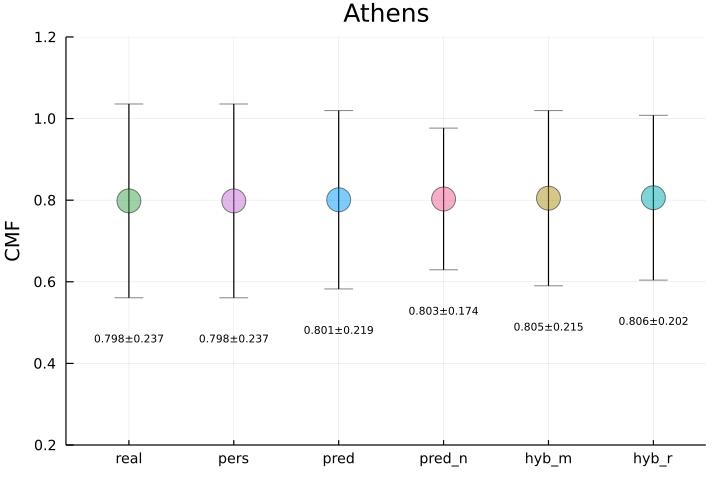

In [15]:
s_at = viz_mn_sd_city(fn_athens, 4)

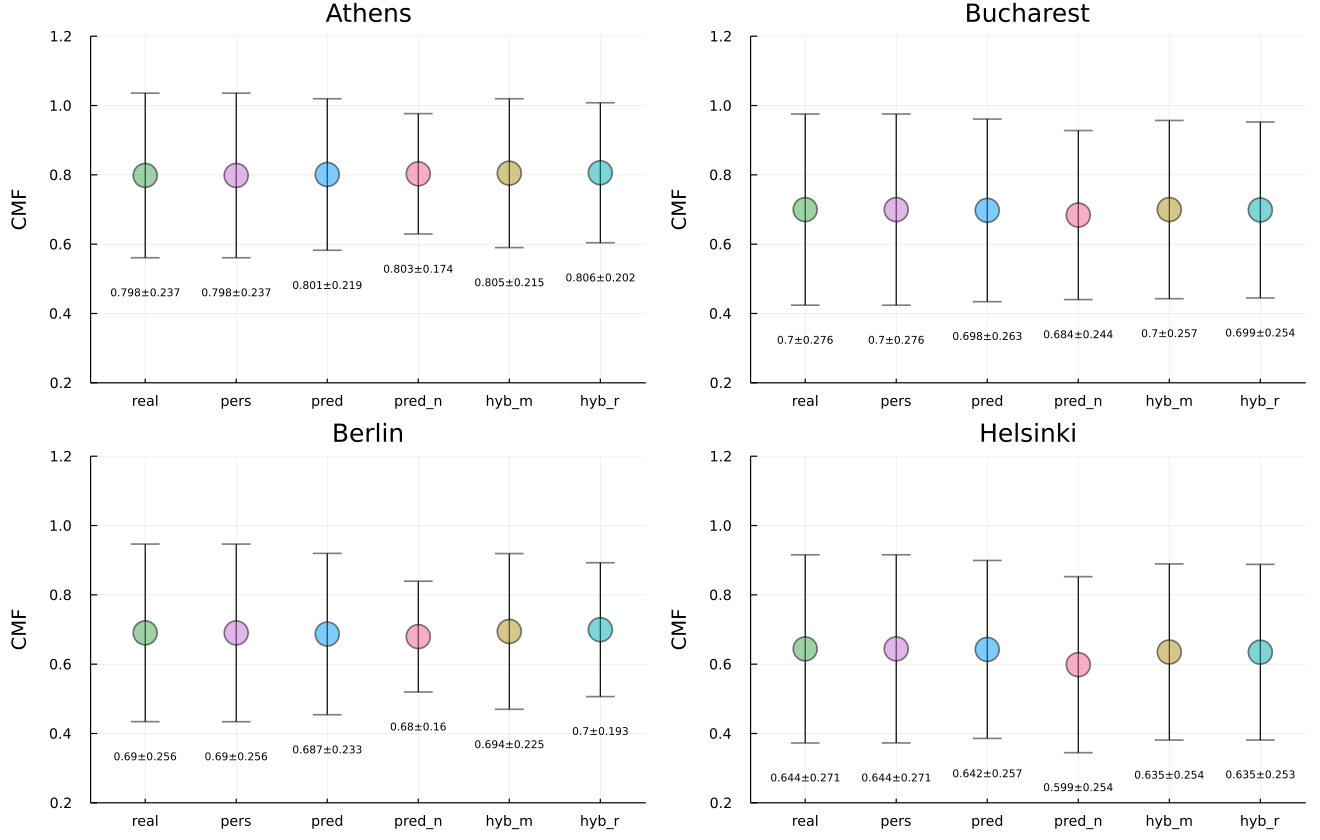

In [16]:
s_bu = viz_mn_sd_city(fn_bucharest, 4)
s_be = viz_mn_sd_city(fn_berlin, 4)
s_he = viz_mn_sd_city(fn_helsinki, 4)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

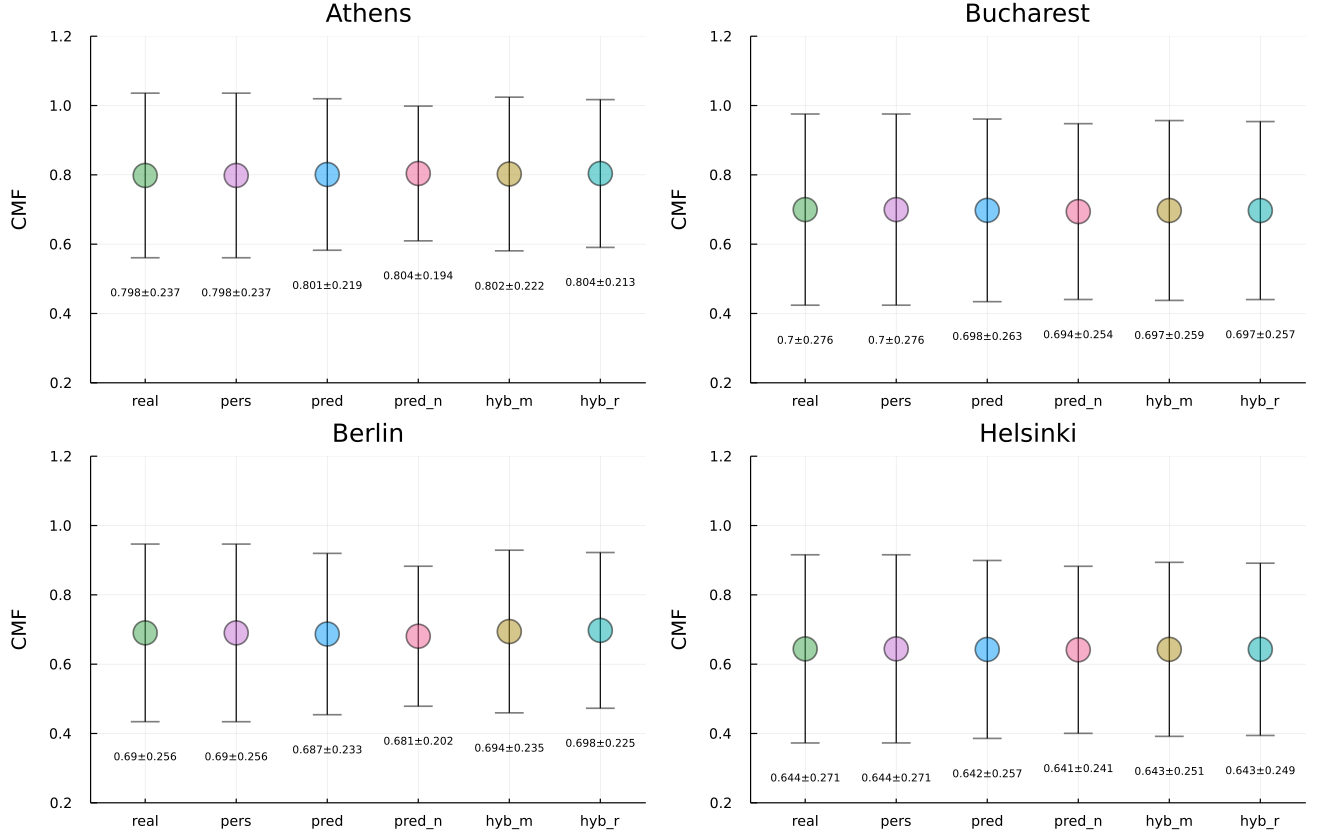

In [51]:
s_at = viz_mn_sd_city(fn_athens)
s_bu = viz_mn_sd_city(fn_bucharest)
s_be = viz_mn_sd_city(fn_berlin)
s_he = viz_mn_sd_city(fn_helsinki)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

#### bias range

In [20]:
function viz_bias_range_city(fn, steps)
    df = get_df_city(fn, steps; hyb=1)
    df2 = df[:, [5, 9, 13, 19, 20]]
    lab = [n[5:end] for n in names(df2)]
    city = split(fn, ['_', '.'])[2]  
    b = boxplot(Array(df2), leg=:none, frame=:zerolines, outliers=false, 
        c=[4 1 7 5 6], label=lab, xticks=(1:size(df2, 2), lab),
        fillalpha=0.5, lw=0.3, 
        ylabel="CMF bias", title=city)
    return b
end

viz_bias_range_city (generic function with 1 method)

In [22]:
bx_at = viz_bias_range_city(fn_athens, 4)

bx_bu = viz_bias_range_city(fn_bucharest, 4)
bx_be = viz_bias_range_city(fn_berlin, 4)
bx_he = viz_bias_range_city(fn_helsinki, 4)

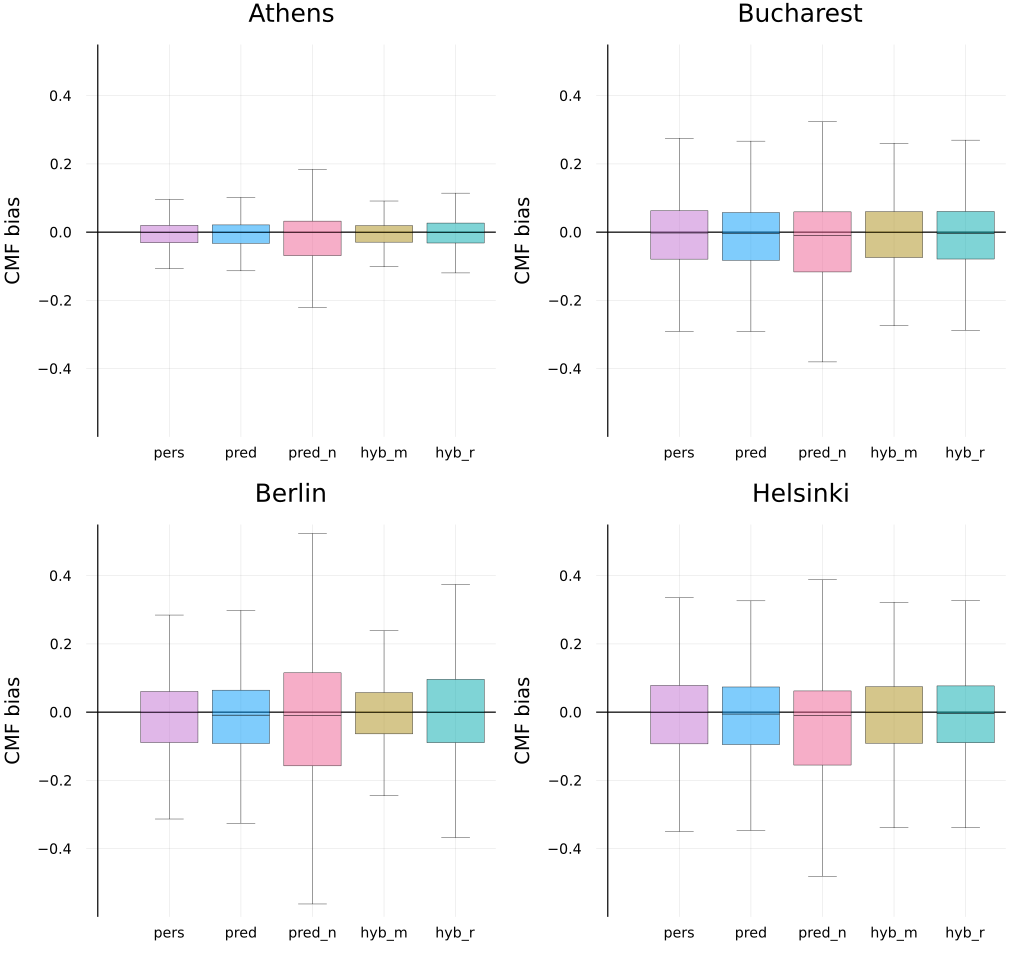

In [24]:
bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), ylim=(-0.6,0.55), size=(850,800))

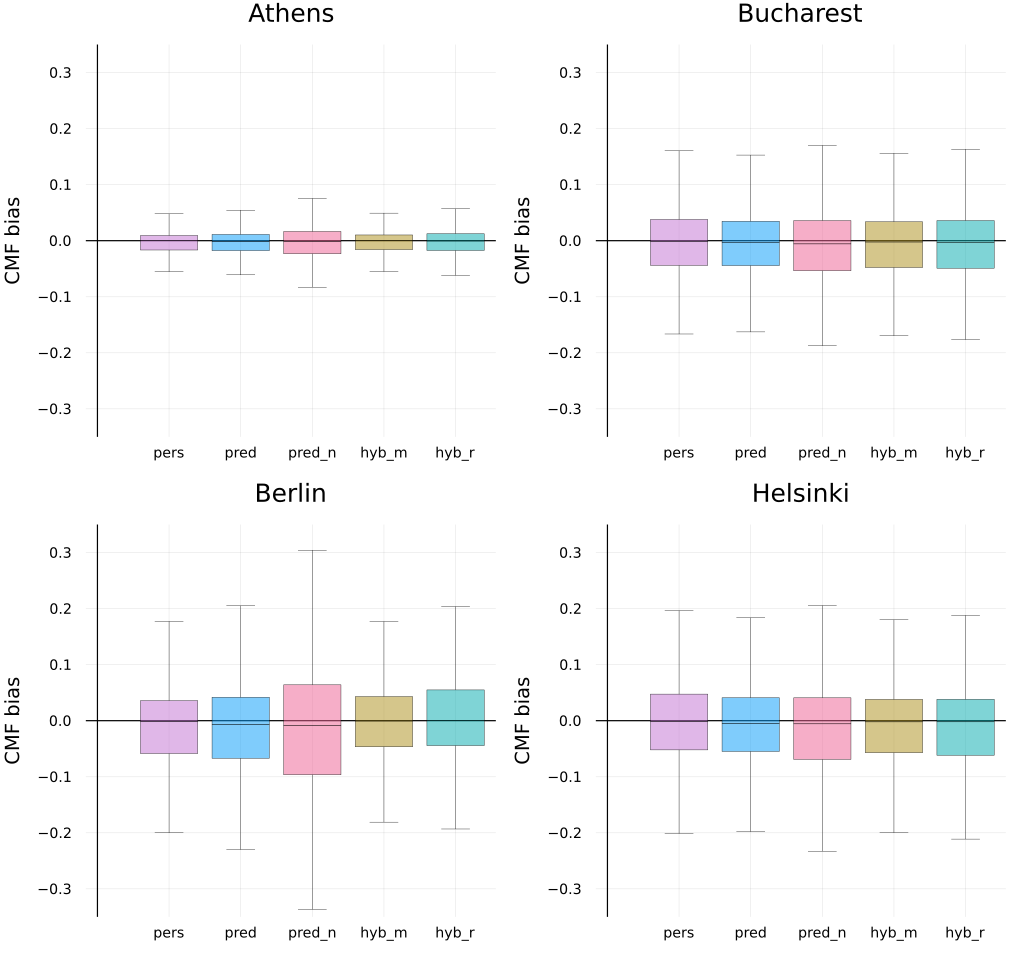

In [62]:
bx_bu = viz_bias_range_city(fn_bucharest)
bx_be = viz_bias_range_city(fn_berlin)
bx_he = viz_bias_range_city(fn_helsinki)

bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), size=(850,800))

#### MAE vs RMSE

In [31]:
function viz_err_city(fn)
    city = split(fn, ['_', '.'])[2] 
    df21 = get_df_city(fn, 1; hyb=1)
    df1 = df21[:,[1, 3, 7, 12, 14]]

    df22 = get_df_city(fn, 2; hyb=1)
    df2 = df22[:,[1, 3, 7, 11, 16, 18]]

    df23 = get_df_city(fn, 3; hyb=1)
    df3 = df23[:,[1, 3, 7, 11, 16, 18]]

    df24 = get_df_city(fn, 4; hyb=1)
    df4 = df24[:,[1, 3, 7, 11, 16, 18]]

    len = size(df2, 2)
    lab = names(df2)[2:end]

    df_err = DataFrame(:method => lab)
    mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(mae1, 3, NaN)
    df_err.mae1 = mae1
    df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]   

    rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(rmse1, 3, NaN)
    df_err.rmse1 = rmse1
    df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 
    @show df_err;
    p = plot(leg=:bottomright, xlim=(0,0.2), #ylim=(0,0.25), 
        xlabel="MAE", ylabel="RMSE", title=city)
    clrs = [4, 1, 7, 5, 6]
    for i in 1:5
        plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(0.7, stroke(0)), c=clrs[i], label=lab[i])
    end
    return p
end

viz_err_city (generic function with 1 method)

df_err = 5×9 DataFrame
 Row │ method  mae1         mae2       mae3       mae4       rmse1       rmse2     rmse3     rmse4
     │ String  Float64      Float64    Float64    Float64    Float64     Float64   Float64   Float64
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0486766  0.0754606  0.092747   0.10159      0.114414  0.156663  0.179285  0.189782
   2 │ pred      0.0517565  0.0750243  0.09087    0.0985733    0.111045  0.150206  0.171365  0.181273
   3 │ pred_n  NaN          0.0834391  0.104478   0.117954   NaN         0.150591  0.172433  0.186205
   4 │ hyb_m     0.0460999  0.0687094  0.0834153  0.0902198    0.108435  0.144832  0.165403  0.174021
   5 │ hyb_r     0.0472823  0.0709428  0.0865833  0.0951897    0.107365  0.14394   0.162072  0.173894


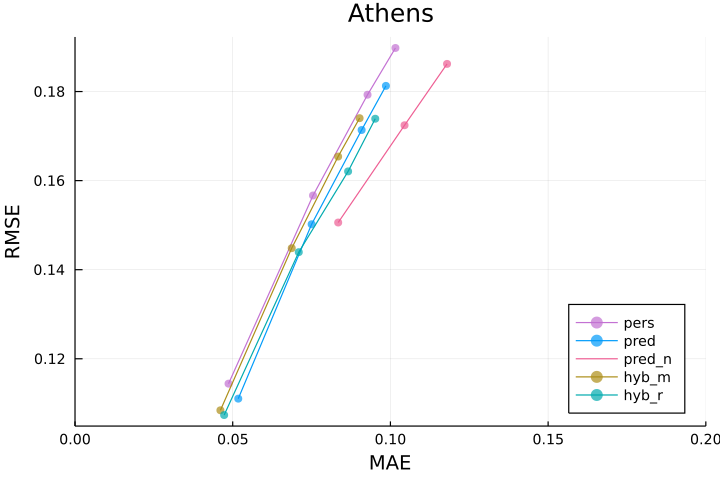

In [32]:
p_at = viz_err_city(fn_athens)

In [29]:
p_bu = viz_err_city(fn_bucharest)

p_be = viz_err_city(fn_berlin)

p_he = viz_err_city(fn_helsinki)

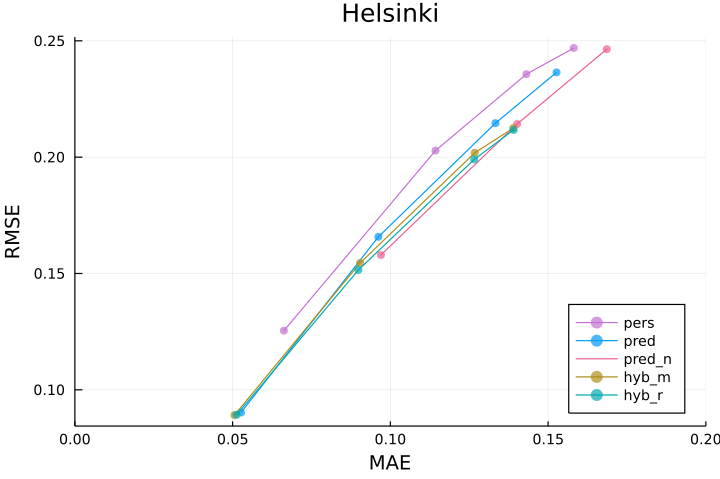

In [13]:
p_he1 = viz_err_city(fn_helsinki)

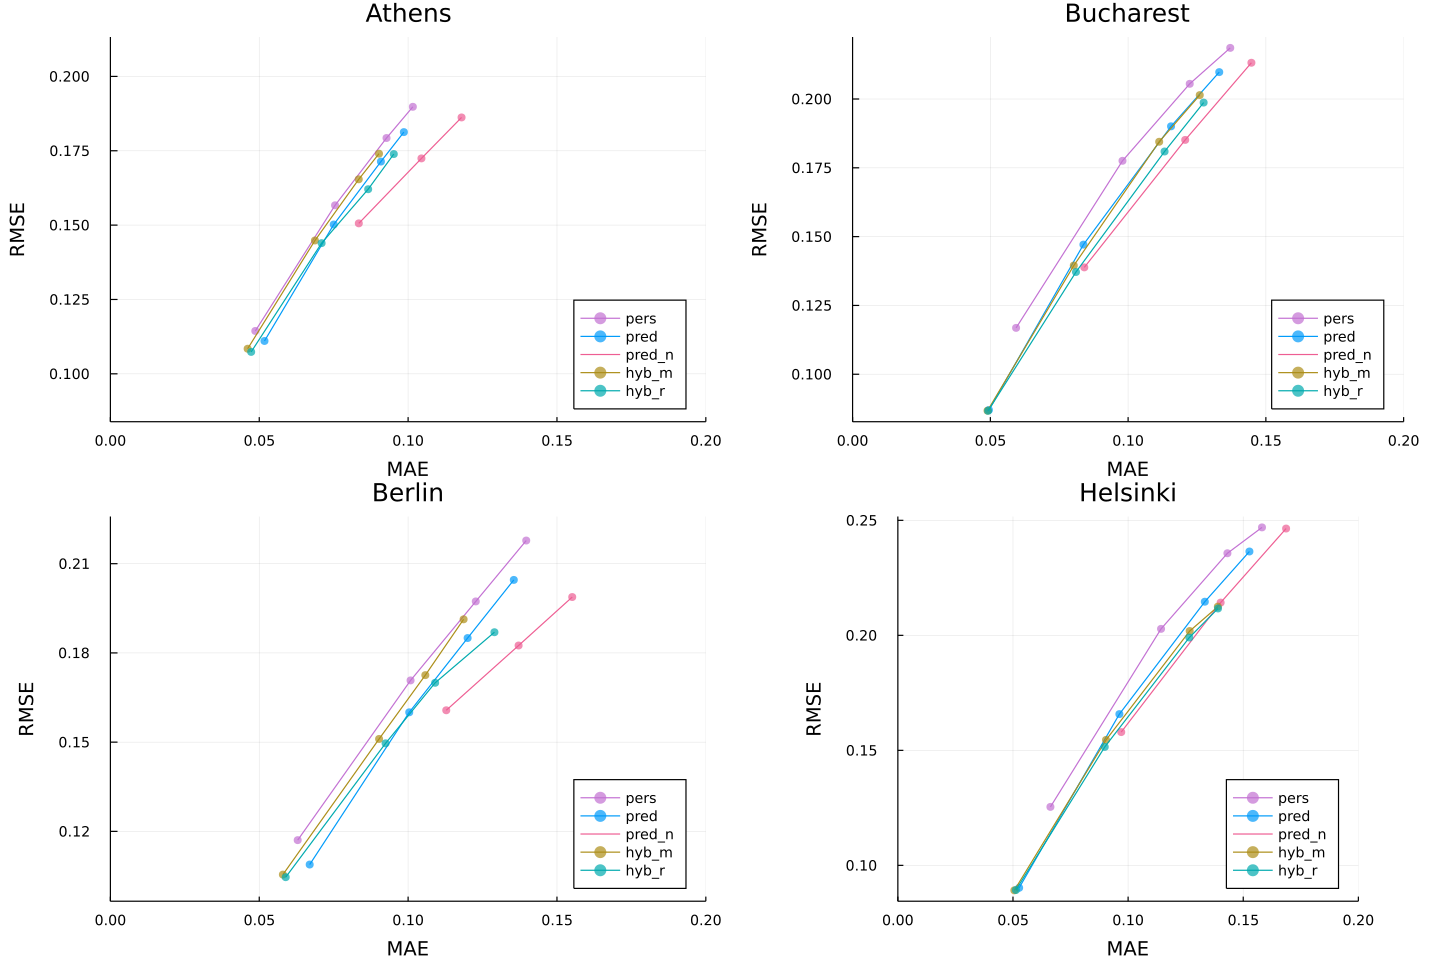

In [30]:
ps = plot(p_at, p_bu, p_be, p_he, layout=@layout([a b; c d]), aspect_ratio=1, leftmargin=20px, size=(1200,800))

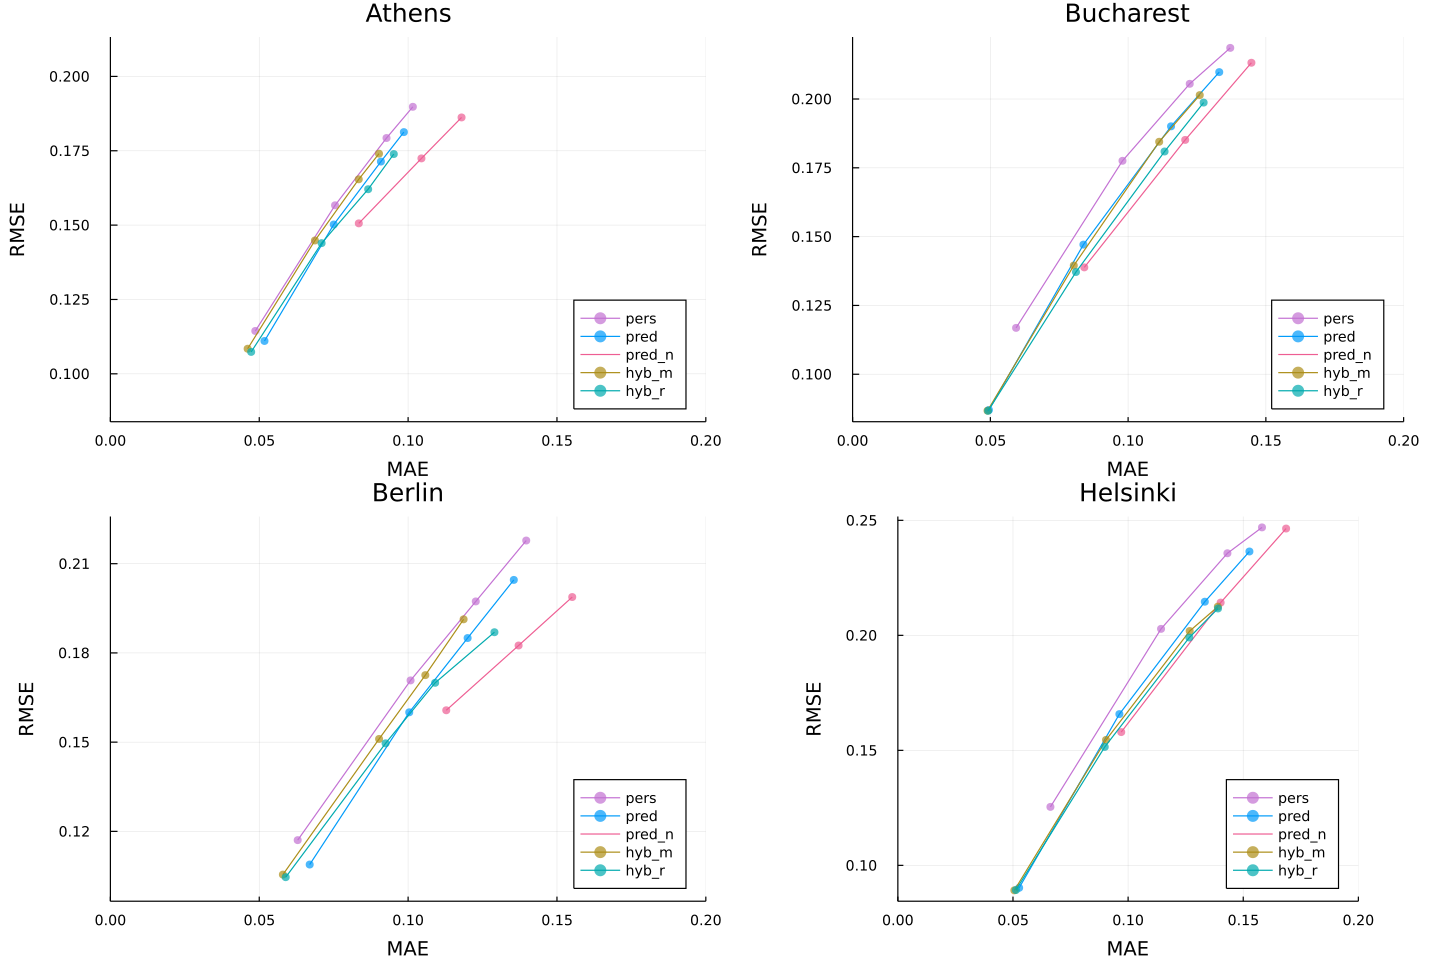

In [131]:
ps = plot(p_at, p_bu, p_be, p_he, layout=@layout([a b; c d]), aspect_ratio=1, leftmargin=20px, size=(1200,800))

#### dif vs bias

In [149]:
function viz_dif_city(fn)
    df22 = get_df_city(fn, 2)
    city = split(fn, ['_', '.'])[2]    
    d = dif_viz(df22, 2; city=city)
    return d
end

viz_dif_city (generic function with 1 method)

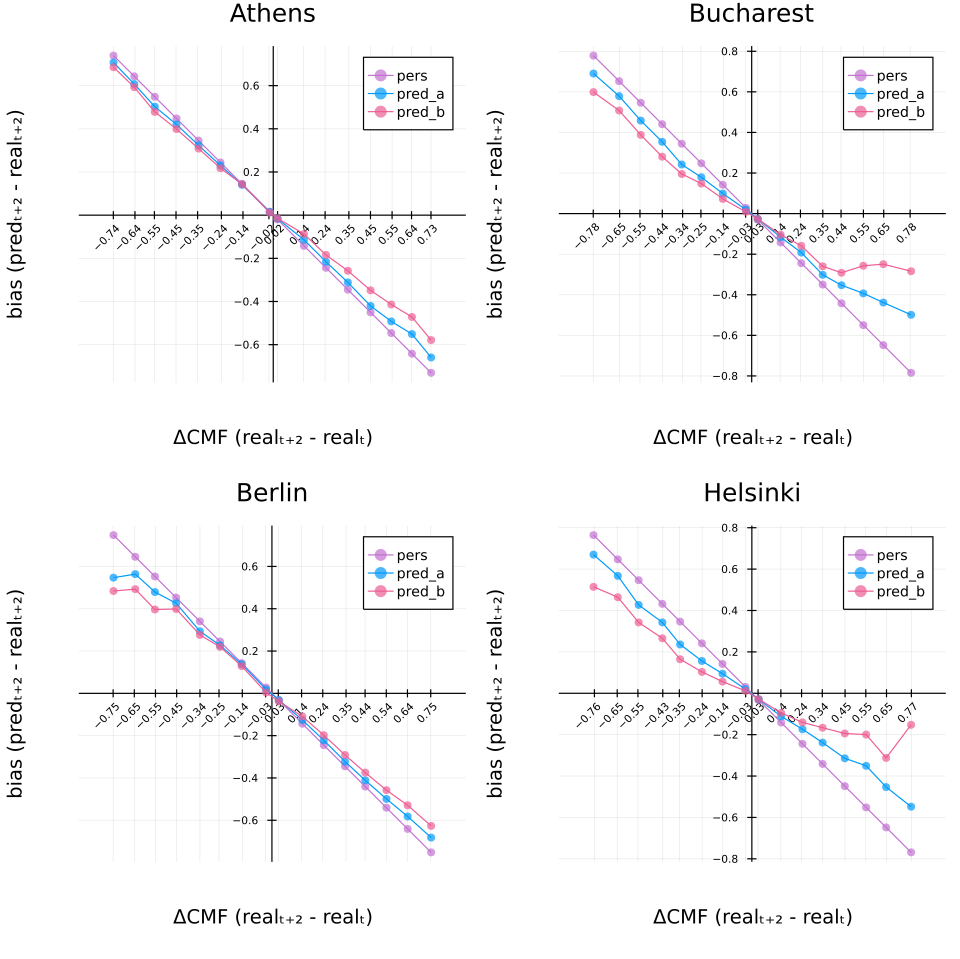

In [152]:
d_at = viz_dif_city(fn_athens)
d_bu = viz_dif_city(fn_bucharest)
d_be = viz_dif_city(fn_berlin)
d_he = viz_dif_city(fn_helsinki)

difs = plot(d_at, d_bu, d_be, d_he, layout=@layout([a b; c d]), size=(800,800))

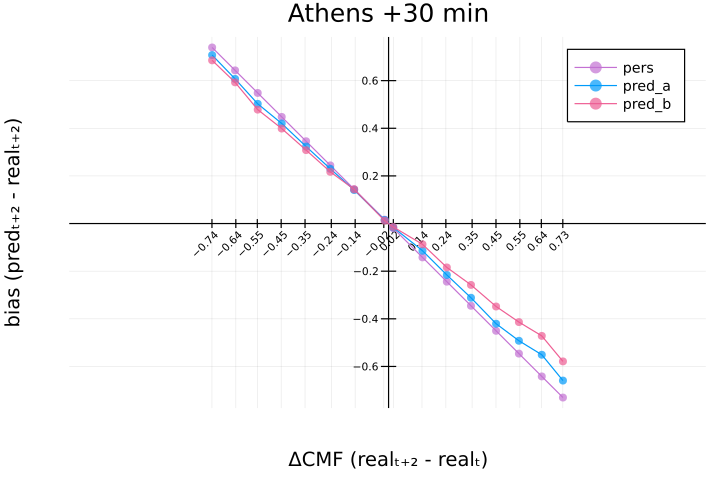

In [87]:
d1 = dif_viz(df22_at, 2; city="Athens")

### +60 min

#### mn ± sd

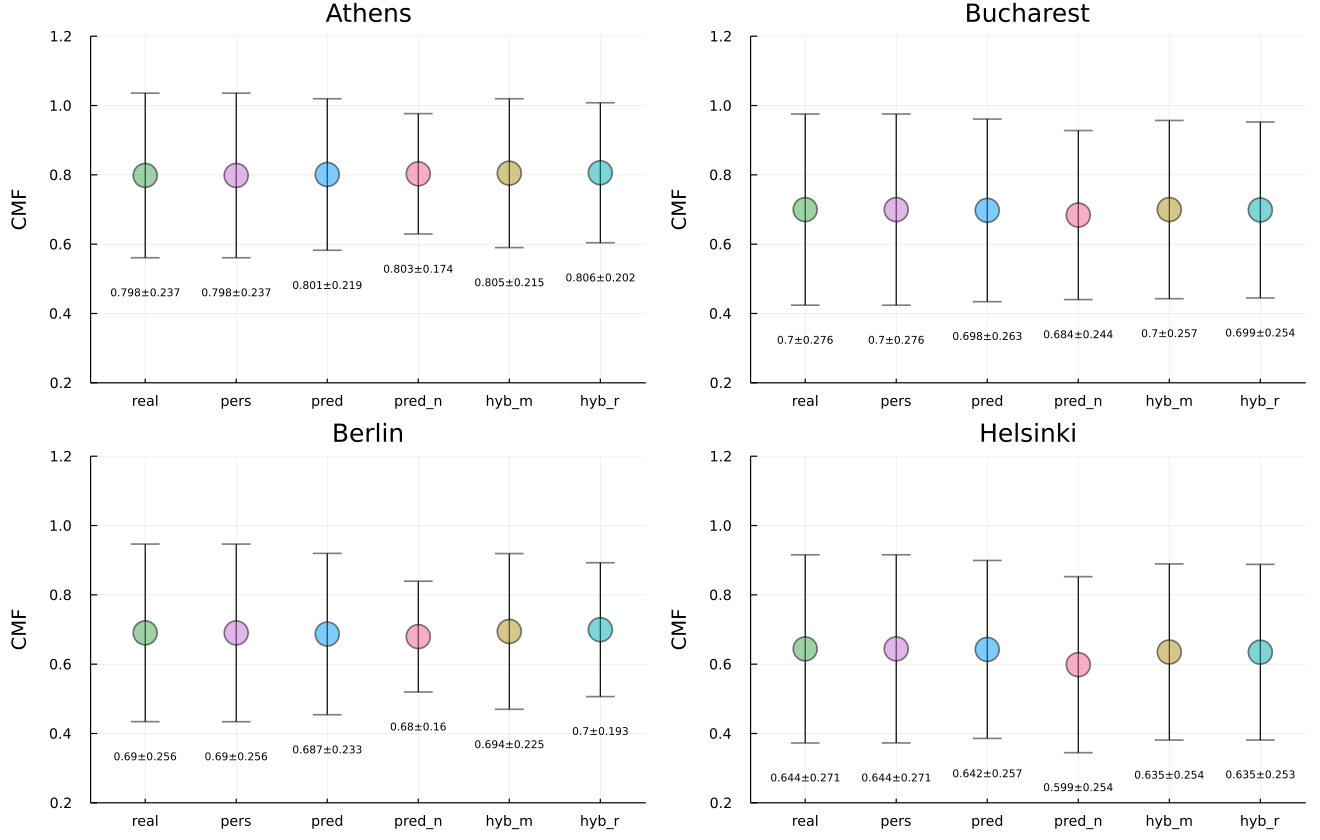

In [16]:
s_bu = viz_mn_sd_city(fn_bucharest, 4)
s_be = viz_mn_sd_city(fn_berlin, 4)
s_he = viz_mn_sd_city(fn_helsinki, 4)

sca = plot(s_at, s_bu, s_be, s_he, layout=@layout([a b; c d]), size=(1100, 700), leftmargin=20px)

#### bias range

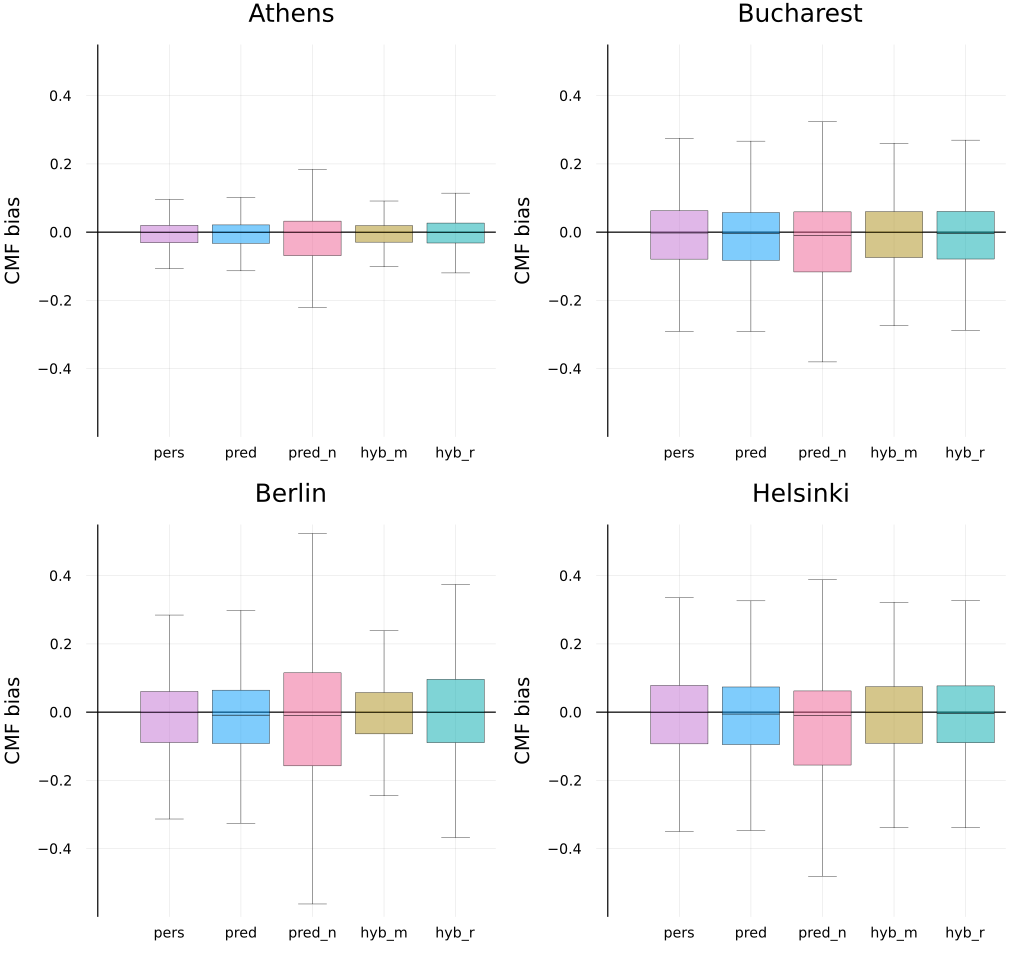

In [24]:
bxs = plot(bx_at, bx_bu, bx_be, bx_he, layout=@layout([a b; c d]), ylim=(-0.6,0.55), size=(850,800))

## Bucharest

In [18]:
city = "Bucharest"
tit = city*" 2020";

In [3]:
fn_city = "irradiation_Bucharest.nc"
fn_city_w  = "irradiation_Bucharest_W.nc"
fn_2020 = "irradiation2020_Bucharest.nc"
fn_2020_w  = "irradiation2020_Bucharest_W.nc";

In [4]:
test = getCMF0(fn_city; raw=1)[2]
test_neib_w = getCMF0(fn_city_w; raw=1)[2]

test2020 = getCMF1(fn_2020)
test2020_neib_w = getCMF1(fn_2020_w);

In [5]:
df01 = getDFtm(fn_city)
df02 = getDFtm(fn_2020);

In [6]:
df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)
data_train = df2_train.real

data_train_cls, binStarts, binMean = getBins(data_train, N);

### compute DFs

In [9]:
df21 = getDF(2, 1)

17578×12 DataFrame
   Row │ time                 month  ghi        ghiCS     real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred     
       │ DateTime             Int8   Float64    Float64   Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64      
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2019-01-01T06:15:00      1   1.44063    2.66281  0.541018  0.0       0.0       0.701037         9  -0.541018    -0.541018     0.160019
     2 │ 2019-01-01T06:30:00      1   4.34724    8.39227  0.518005  0.541018  0.537037  0.524795         9   0.0230135    0.0190325    0.00679039
     3 │ 2019-01-01T06:45:00      1   5.96034   15.5833   0.382483  0.518005  0.517414  0.263043         6   0.135522     0.13493     -0.11944
     4 │ 2019-01-01T07:00:00      1   4.24268   23.5071   0.180485  0.382483  0.383357  0.185568         2   0.201998     0.202872     0.00508304
     5 │ 2019-01-01T07:15:00      1   3.57957   31.706    0.112899  0.180485  0.1826    0.14909          1   0.0675861    0.0697011    0.0361915
     6 │ 2019-01-01T07:30:00      1   5.56104   39.8769   0.139455  0.112899  0.115165  0.22646          2  -0.0265561   -0.0242899    0.0870046
     7 │ 2019-01-01T07:45:00      1   7.80981   47.8105   0.163349  0.139455  0.140899  0.183521         2  -0.0238941   -0.0224506    0.0201717
     8 │ 2019-01-01T08:00:00      1  10.5766    55.3559   0.191066  0.163349  0.16969   0.257132         3  -0.027717    -0.0213764    0.0660658
     9 │ 2019-01-01T08:15:00      1  12.7706    62.4001   0.204656  0.191066  0.197448  0.236138         3  -0.0135899   -0.00720853   0.0314816
    10 │ 2019-01-01T08:30:00      1  12.9482    68.8562   0.188047  0.204656  0.206542  0.188868         2   0.0166093    0.0184949    0.00082101
    11 │ 2019-01-01T08:45:00      1  15.8344    74.6556   0.212099  0.188047  0.190487  0.257132         3  -0.0240524   -0.0216125    0.0450328
   ⋮   │          ⋮             ⋮        ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮
 17569 │ 2019-12-31T12:30:00     12  57.491     67.2912   0.854362  0.818614  0.837563  0.839431        18  -0.0357477   -0.0167989   -0.0149304
 17570 │ 2019-12-31T12:45:00     12  52.2571    60.6022   0.862298  0.854362  0.858698  0.868725        19  -0.00793616  -0.00359974   0.00642673
 17571 │ 2019-12-31T13:00:00     12  46.7631    53.3513   0.876512  0.862298  0.869941  0.85962         19  -0.0142142   -0.00657096  -0.0168925
 17572 │ 2019-12-31T13:15:00     12  40.3619    45.6177   0.884786  0.876512  0.872021  0.892065        20  -0.00827354  -0.0127642    0.00727978
 17573 │ 2019-12-31T13:30:00     12  32.8399    37.5022   0.875679  0.884786  0.882101  0.843074        19   0.00910627   0.0064214   -0.032605
 17574 │ 2019-12-31T13:45:00     12  25.0463    29.1424   0.859445  0.875679  0.889246  0.85962         19   0.0162342    0.0298011    0.000174357
 17575 │ 2019-12-31T14:00:00     12  17.5789    20.7447   0.847393  0.859445  0.869898  0.793802        18   0.012052     0.0225047   -0.053591
 17576 │ 2019-12-31T14:15:00     12  10.5205    12.6573   0.831182  0.847393  0.84554   0.788562        17   0.0162111    0.0143581   -0.0426204
 17577 │ 2019-12-31T14:30:00     12   3.94274    5.52592  0.7135    0.831182  0.823812  0.495589        13   0.117682     0.110311    -0.217911
 17578 │ 2019-12-31T14:45:00     12   0.269495   0.74236  0.363025  0.7135    0.704047  0.418299         6   0.350475     0.341022     0.0552741
                                                                                                                                 17557 rows omitted

In [10]:
df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

In [11]:
df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)

17616×12 DataFrame
   Row │ time                 month  ghi        ghiCS      real      pers      neib      pred      real_cls  dif_pers      dif_neib      dif_pred     
       │ DateTime             Int8   Float64    Float64    Float64   Float64   Float64   Float64   Int64     Float64       Float64       Float64      
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T06:15:00      1   1.85817    3.17138   0.585918  0.0       0.0       0.678484        10  -0.585918     -0.585918      0.0925658
     2 │ 2020-01-01T06:30:00      1   8.37032   10.0642    0.831696  0.585918  0.583341  0.743932        17  -0.245777     -0.248355     -0.0877636
     3 │ 2020-01-01T06:45:00      1  15.9652    18.3951    0.867907  0.831696  0.83021   0.877727        19  -0.0362109    -0.0376968     0.0098203
     4 │ 2020-01-01T07:00:00      1  23.6427    27.2447    0.867791  0.867907  0.868459  0.85962         19   0.00011624    0.000668431  -0.008171
     5 │ 2020-01-01T07:15:00      1  31.387     36.1436    0.868398  0.867791  0.887495  0.85962         19  -0.000607329   0.0190967    -0.00877833
     6 │ 2020-01-01T07:30:00      1  39.3942    44.8328    0.878691  0.868398  0.885658  0.892065        20  -0.010293      0.00696741    0.0133745
     7 │ 2020-01-01T07:45:00      1  46.8173    53.1525    0.880811  0.878691  0.899792  0.879822        20  -0.00212024    0.0189805    -0.000989029
     8 │ 2020-01-01T08:00:00      1  53.5387    60.9914    0.877807  0.880811  0.902585  0.843074        19   0.00300376    0.0247781    -0.034733
     9 │ 2020-01-01T08:15:00      1  58.3371    68.2647    0.854573  0.877807  0.893078  0.793802        18   0.0232345     0.0385054    -0.0607707
    10 │ 2020-01-01T08:30:00      1  63.8929    74.904     0.852998  0.854573  0.879541  0.838935        18   0.00157515    0.0265433    -0.0140625
    11 │ 2020-01-01T08:45:00      1  67.7056    80.853     0.837391  0.852998  0.884628  0.788562        17   0.0156062     0.047237     -0.0488298
   ⋮   │          ⋮             ⋮        ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮             ⋮             ⋮
 17607 │ 2020-12-31T12:30:00     12  37.7032    62.5196    0.603063  0.826645  0.5849    0.228903        11   0.223582     -0.0181628    -0.37416
 17608 │ 2020-12-31T12:45:00     12  38.4691    56.2815    0.683511  0.603063  0.476998  0.678745        12  -0.0804482    -0.206513     -0.00476648
 17609 │ 2020-12-31T13:00:00     12  32.1347    49.5029    0.649149  0.683511  0.586632  0.661819        12   0.0343625    -0.0625162     0.0126708
 17610 │ 2020-12-31T13:15:00     12  30.9607    42.2696    0.732457  0.649149  0.639003  0.760427        14  -0.083308     -0.0934537     0.0279702
 17611 │ 2020-12-31T13:30:00     12  25.9338    34.6918    0.747547  0.732457  0.795953  0.733509        14  -0.0150909     0.0484059    -0.0140387
 17612 │ 2020-12-31T13:45:00     12  19.4884    26.9166    0.72403   0.747547  0.609267  0.671431        13   0.0235173    -0.114763     -0.0525992
 17613 │ 2020-12-31T14:00:00     12  13.9626    19.1542    0.728955  0.72403   0.678485  0.744877        14  -0.00492476   -0.05047       0.0159219
 17614 │ 2020-12-31T14:15:00     12   9.3262    11.7344    0.794776  0.728955  0.600385  0.812707        16  -0.0658208    -0.19439       0.0179313
 17615 │ 2020-12-31T14:30:00     12   3.84917    5.23561   0.73519   0.794776  0.726478  0.674008        14   0.059586     -0.00871221   -0.0611822
 17616 │ 2020-12-31T14:45:00     12   0.277089   0.809323  0.342371  0.73519   0.73403   0.364593         5   0.392818      0.391659      0.0222215
                                                                                                                                    17595 rows omitted

In [12]:
df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

In [13]:
df1t = hybrid(df21, df21_2020, 1)

17616×18 DataFrame
   Row │ time                 month  ghi        ghiCS      real      pers      neib      pred      real_cls  dif_pers      dif_neib      dif_pred      mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_ ⋯
       │ DateTime             Int8   Float64    Float64    Float64   Float64   Float64   Float64   Int64     Float64       Float64       Float64       Int64    Float64   Int64     Float64   Float64  ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T06:15:00      1   1.85817    3.17138   0.585918  0.0       0.0       0.678484        10  -0.585918     -0.585918      0.0925658          0  0.0              0  0.0       -0.58591 ⋯
     2 │ 2020-01-01T06:30:00      1   8.37032   10.0642    0.831696  0.585918  0.583341  0.743932        17  -0.245777     -0.248355     -0.0877636          3  0.743932         3  0.743932  -0.08776
     3 │ 2020-01-01T06:45:00      1  15.9652    18.3951    0.867907  0.831696  0.83021   0.877727        19  -0.0362109    -0.0376968     0.0098203          3  0.877727         3  0.877727   0.00982
     4 │ 2020-01-01T07:00:00      1  23.6427    27.2447    0.867791  0.867907  0.868459  0.85962         19   0.00011624    0.000668431  -0.008171           3  0.85962          3  0.85962   -0.00817
     5 │ 2020-01-01T07:15:00      1  31.387     36.1436    0.868398  0.867791  0.887495  0.85962         19  -0.000607329   0.0190967    -0.00877833         3  0.85962          3  0.85962   -0.00877 ⋯
     6 │ 2020-01-01T07:30:00      1  39.3942    44.8328    0.878691  0.868398  0.885658  0.892065        20  -0.010293      0.00696741    0.0133745          3  0.892065         3  0.892065   0.01337
     7 │ 2020-01-01T07:45:00      1  46.8173    53.1525    0.880811  0.878691  0.899792  0.879822        20  -0.00212024    0.0189805    -0.000989029        3  0.879822         3  0.879822  -0.00098
     8 │ 2020-01-01T08:00:00      1  53.5387    60.9914    0.877807  0.880811  0.902585  0.843074        19   0.00300376    0.0247781    -0.034733           3  0.843074         3  0.843074  -0.03473
     9 │ 2020-01-01T08:15:00      1  58.3371    68.2647    0.854573  0.877807  0.893078  0.793802        18   0.0232345     0.0385054    -0.0607707          3  0.793802         3  0.793802  -0.06077 ⋯
    10 │ 2020-01-01T08:30:00      1  63.8929    74.904     0.852998  0.854573  0.879541  0.838935        18   0.00157515    0.0265433    -0.0140625          3  0.838935         3  0.838935  -0.01406
    11 │ 2020-01-01T08:45:00      1  67.7056    80.853     0.837391  0.852998  0.884628  0.788562        17   0.0156062     0.047237     -0.0488298          3  0.788562         3  0.788562  -0.04882
   ⋮   │          ⋮             ⋮        ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮             ⋮             ⋮           ⋮        ⋮         ⋮         ⋮           ⋮   ⋱
 17607 │ 2020-12-31T12:30:00     12  37.7032    62.5196    0.603063  0.826645  0.5849    0.228903        11   0.223582     -0.0181628    -0.37416            3  0.228903         3  0.228903  -0.37416
 17608 │ 2020-12-31T12:45:00     12  38.4691    56.2815    0.683511  0.603063  0.476998  0.678745        12  -0.0804482    -0.206513     -0.00476648         3  0.678745         3  0.678745  -0.00476 ⋯
 17609 │ 2020-12-31T13:00:00     12  32.1347    49.5029    0.649149  0.683511  0.586632  0.661819        12   0.0343625    -0.0625162     0.0126708          3  0.661819         3  0.661819   0.01267
 17610 │ 2020-12-31T13:15:00     12  30.9607    42.2696    0.732457  0.649149  0.639003  0.760427        14  -0.083308     -0.0934537     0.0279702          3  0.760427         3  0.760427   0.02797
 17611 │ 2020-12-31T13:30:00     12  25.9338    34.6918    0.747547  0.732457  0.795953  0.733509        14  -0.0150909     0.0484059    -0.0140387          3  0.733509         3  0.73

In [14]:
df2t = hybrid(df22, df22_2020, 2)
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

### mn ± sd 

In [7]:
# apply time steps
aplTs(df, func) = combine(df, :dif_pers => func => :pers, :dif_neib => func => :neib, :dif_pred => func => :pred, 
    :dif_hyb_r => func => :hyb_r, :dif_hyb_m => func => :hyb_m);

In [15]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col3 = combine(df2t, :dif_pred_n => std => :pred_n)
append!(col3, combine(df3t, :dif_pred_n => std => :pred_n))
append!(col3, combine(df4t, :dif_pred_n => std => :pred_n))

col4 = reshape([NaN; Array(col3)], 4);

insertcols!(sds, 4, :pred_n => col4)

4×6 DataFrame
 Row │ pers      neib      pred       pred_n       hyb_r      hyb_m     
     │ Float64   Float64   Float64    Float64      Float64    Float64   
─────┼──────────────────────────────────────────────────────────────────
   1 │ 0.105219  0.122988  0.0659488  NaN          0.0661101  0.0661395
   2 │ 0.149744  0.15882   0.0694821    0.0871559  0.0705186  0.0705186
   3 │ 0.170843  0.175141  0.117992     0.127225   0.115488   0.1128
   4 │ 0.186836  0.189075  0.148869     0.160187   0.14182    0.14113

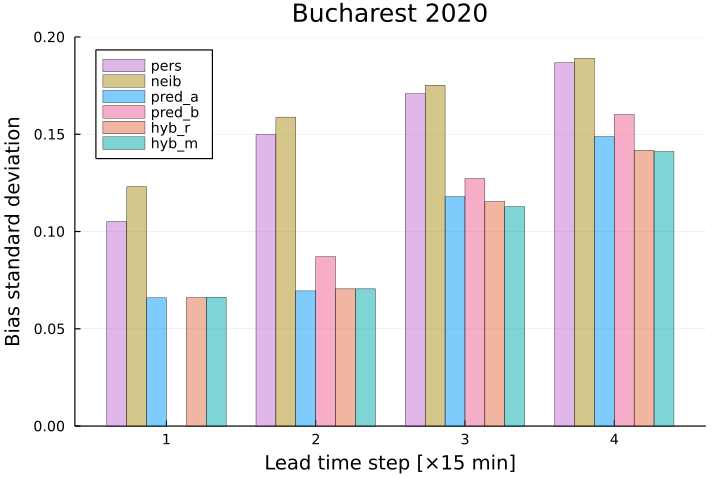

In [21]:
gb_bu = groupedbar(Matrix(sds), leg=:topleft, lw=0.3, fillalpha=0.5, grid=:y,
    c=[4 5 1 7 2 6], label=["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"],
    ylim=(0, 0.2), xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=tit)

### rmse vs mae

df_err = 6×9 DataFrame
 Row │ method  mae1         mae2       mae3       mae4       rmse1        rmse2      rmse3     rmse4
     │ String  Float64      Float64    Float64    Float64    Float64      Float64    Float64   Float64
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0526029  0.0806869  0.100095   0.114059     0.105226   0.149765   0.170855  0.186833
   2 │ neib      0.0665743  0.086931   0.102439   0.115009     0.123052   0.158903   0.175205  0.1891
   3 │ pred_a    0.0333431  0.0400192  0.0658948  0.0879538    0.0659951  0.0695794  0.118413  0.149145
   4 │ pred_b  NaN          0.0523621  0.0788501  0.104257   NaN          0.0871684  0.127222  0.160207
   5 │ hyb_m     0.0332424  0.0405192  0.0647413  0.0856175    0.0661667  0.0706664  0.113352  0.141399
   6 │ hyb_r     0.0333372  0.0405192  0.067749   0.0862433    0.06615    0.0706664  0.116448  0.142166


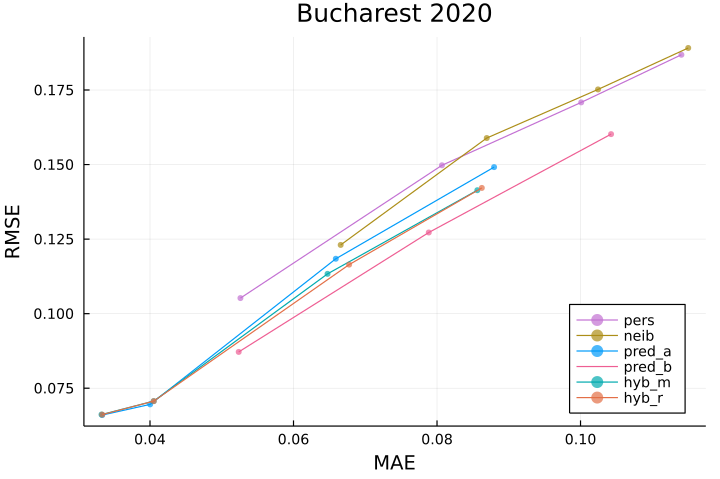

In [22]:
p = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=tit)

### First order difference

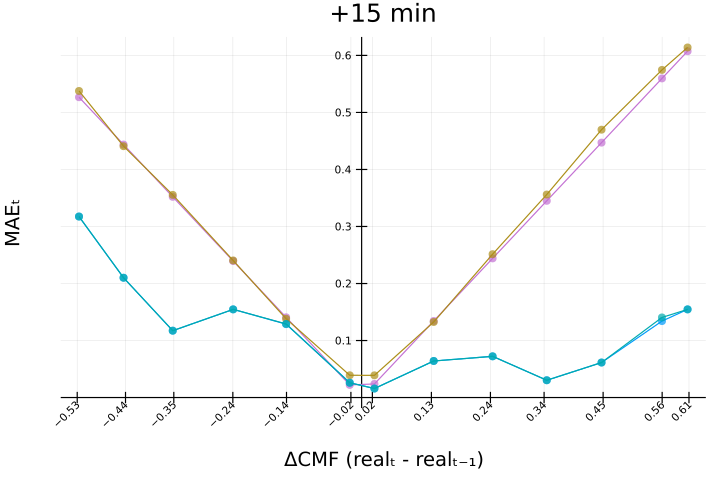

In [23]:
dif1 = viz_dif(df1t, 1)

In [24]:
dif2 = viz_dif(df2t, 2)
dif3 = viz_dif(df3t, 3)
dif4 = viz_dif(df4t, 4);

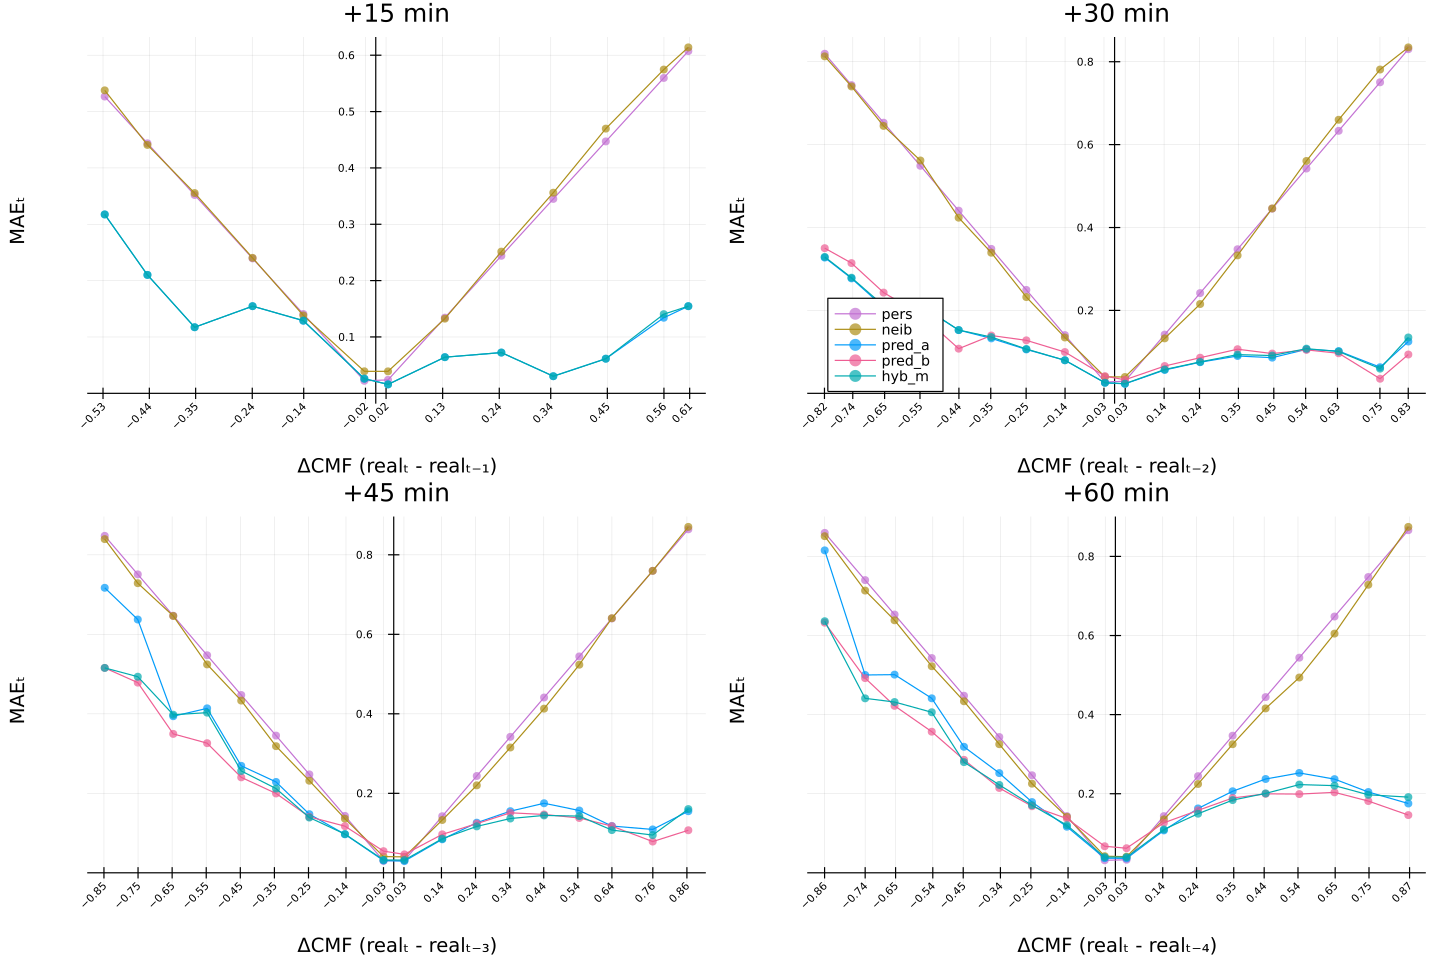

In [25]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAEₜ")

### Monthly avg

In [26]:
gb = groupby(df1t, :month)
ghi_mo = [mean(g.ghi) for g in gb]
cmf_mo = [mean(g.real) for g in gb];

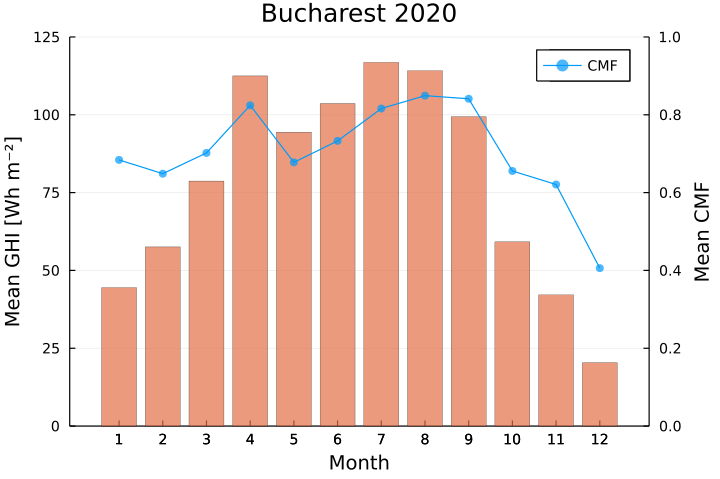

In [29]:
b_bu = bar(ghi_mo, c=2, lw=0.2, fillalpha=0.7, grid=:y, right_margin=1.3cm,
    xtick=1:12, ytick=0:25:150, ylim=(0,125), 
    xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=tit)
plot!(twinx(), cmf_mo, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### GHI evaluation

In [30]:
df1g = getGHI(df1t, 1)

17616×7 DataFrame
   Row │ month  ghi        ghi_pers   ghi_neib   ghi_pred   ghi_hyb_m  ghi_hyb_r 
       │ Int8   Float64    Float64    Float64    Float64    Float64    Float64   
───────┼─────────────────────────────────────────────────────────────────────────
     1 │     1   1.85817    0.0        0.0        2.15173    0.0        0.0
     2 │     1   8.37032    5.89678    5.87084    7.48705    7.48705    7.48705
     3 │     1  15.9652    15.2991    15.2718    16.1459    16.1459    16.1459
     4 │     1  23.6427    23.6458    23.6609    23.42      23.42      23.42
     5 │     1  31.387     31.365     32.0772    31.0697    31.0697    31.0697
     6 │     1  39.3942    38.9327    39.7065    39.9938    39.9938    39.9938
     7 │     1  46.8173    46.7046    47.8262    46.7647    46.7647    46.7647
     8 │     1  53.5387    53.7219    55.0499    51.4203    51.4203    51.4203
     9 │     1  58.3371    59.9232    60.9657    54.1886    54.1886    54.1886
    10 │     1  63.8929    64.0109    65.8811    62.8396    62.8396    62.8396
    11 │     1  67.7056    68.9674    71.5249    63.7576    63.7576    63.7576
   ⋮   │   ⋮        ⋮          ⋮          ⋮          ⋮          ⋮          ⋮
 17607 │    12  37.7032    51.6815    36.5677    14.3109    14.3109    14.3109
 17608 │    12  38.4691    33.9413    26.8462    38.2008    38.2008    38.2008
 17609 │    12  32.1347    33.8358    29.04      32.7619    32.7619    32.7619
 17610 │    12  30.9607    27.4393    27.0104    32.143     32.143     32.143
 17611 │    12  25.9338    25.4103    27.6131    25.4468    25.4468    25.4468
 17612 │    12  19.4884    20.1214    16.3994    18.0726    18.0726    18.0726
 17613 │    12  13.9626    13.8682    12.9959    14.2675    14.2675    14.2675
 17614 │    12   9.3262     8.55383    7.04515    9.53661    9.53661    9.53661
 17615 │    12   3.84917    4.16114    3.80355    3.52884    3.52884    3.52884
 17616 │    12   0.277089   0.595006   0.594068   0.295073   0.295073   0.295073
                                                               17595 rows omitted

In [31]:
df2g = getGHI(df2t, 2)
df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

#### MAE

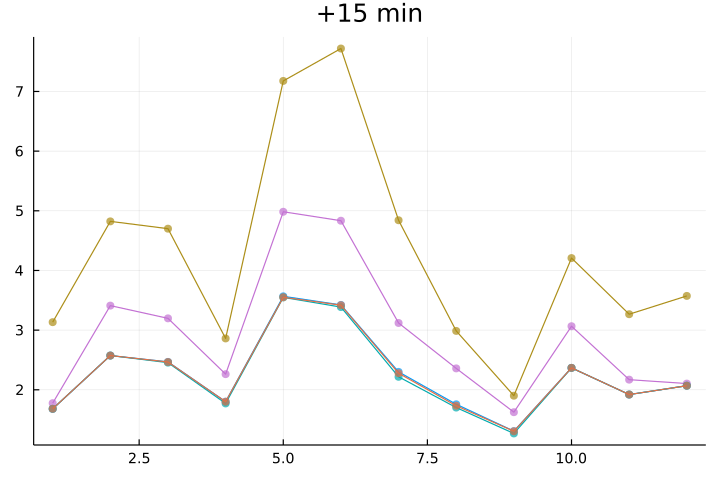

In [32]:
pg1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min")

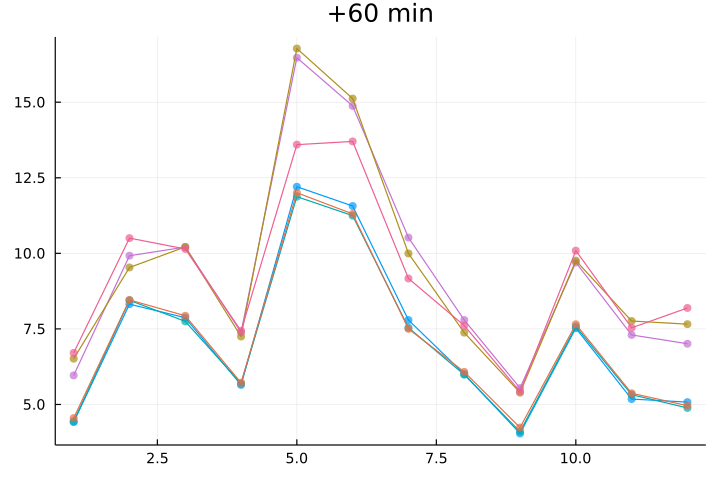

In [33]:
pg2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min")
pg3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min")
pg4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min")

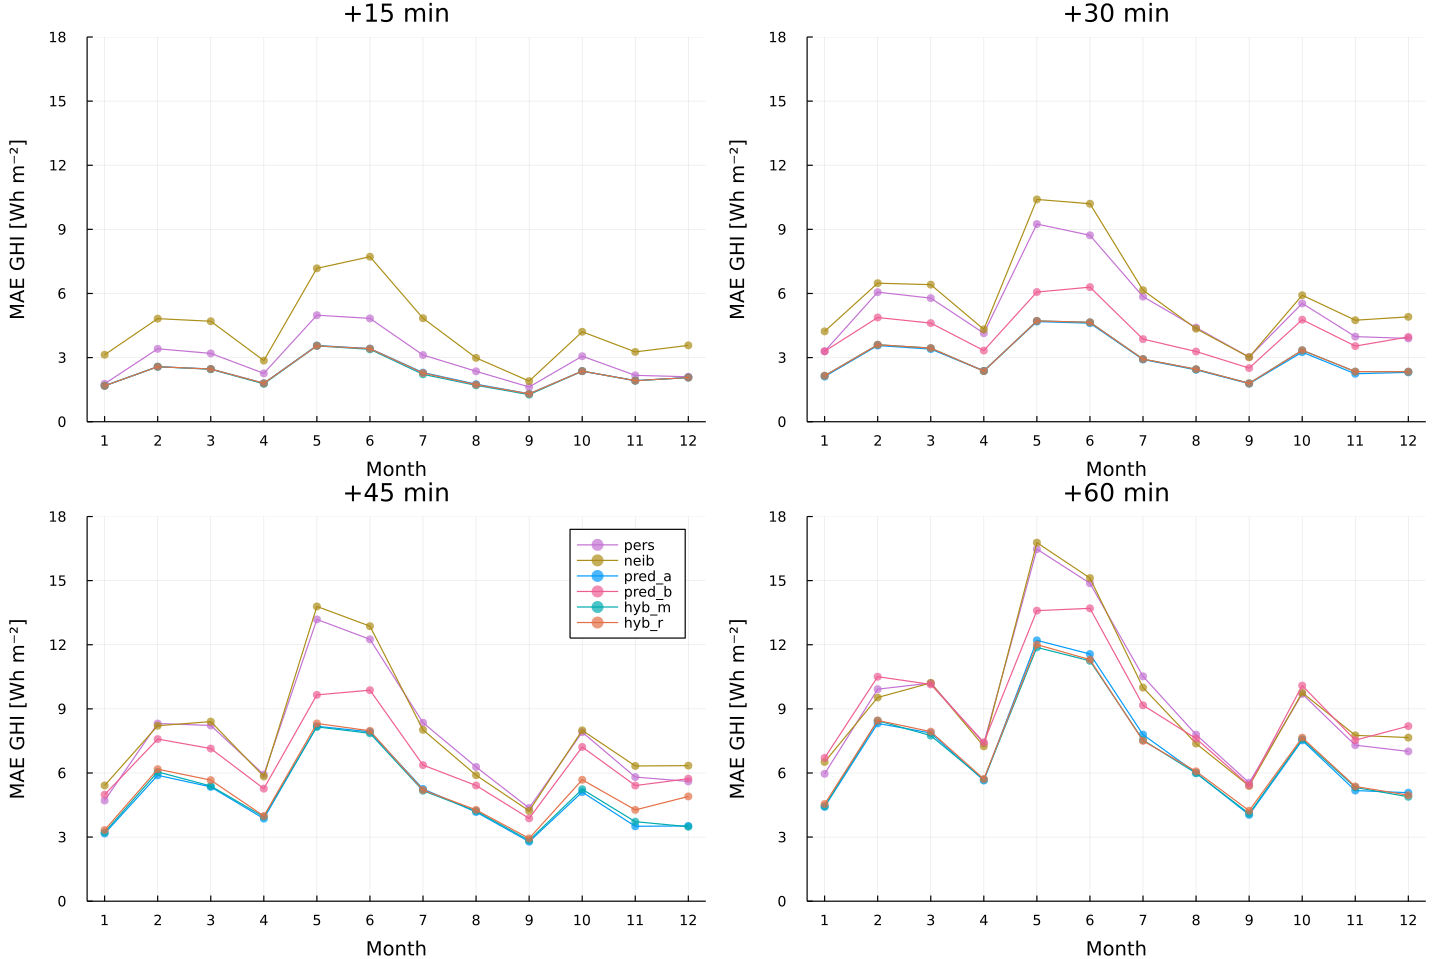

In [34]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), ylim=(0,18), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

#### RMSE

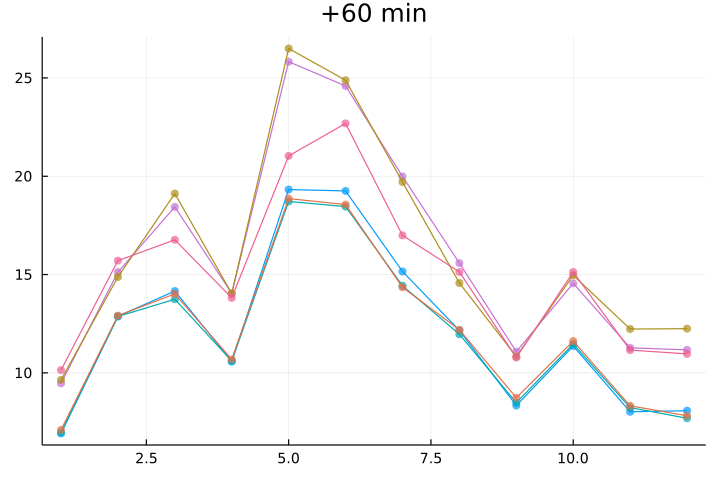

In [35]:
pgr1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min", err="rmse")

pgr2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min", err="rmse")
pgr3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min", err="rmse")
pgr4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min", err="rmse")

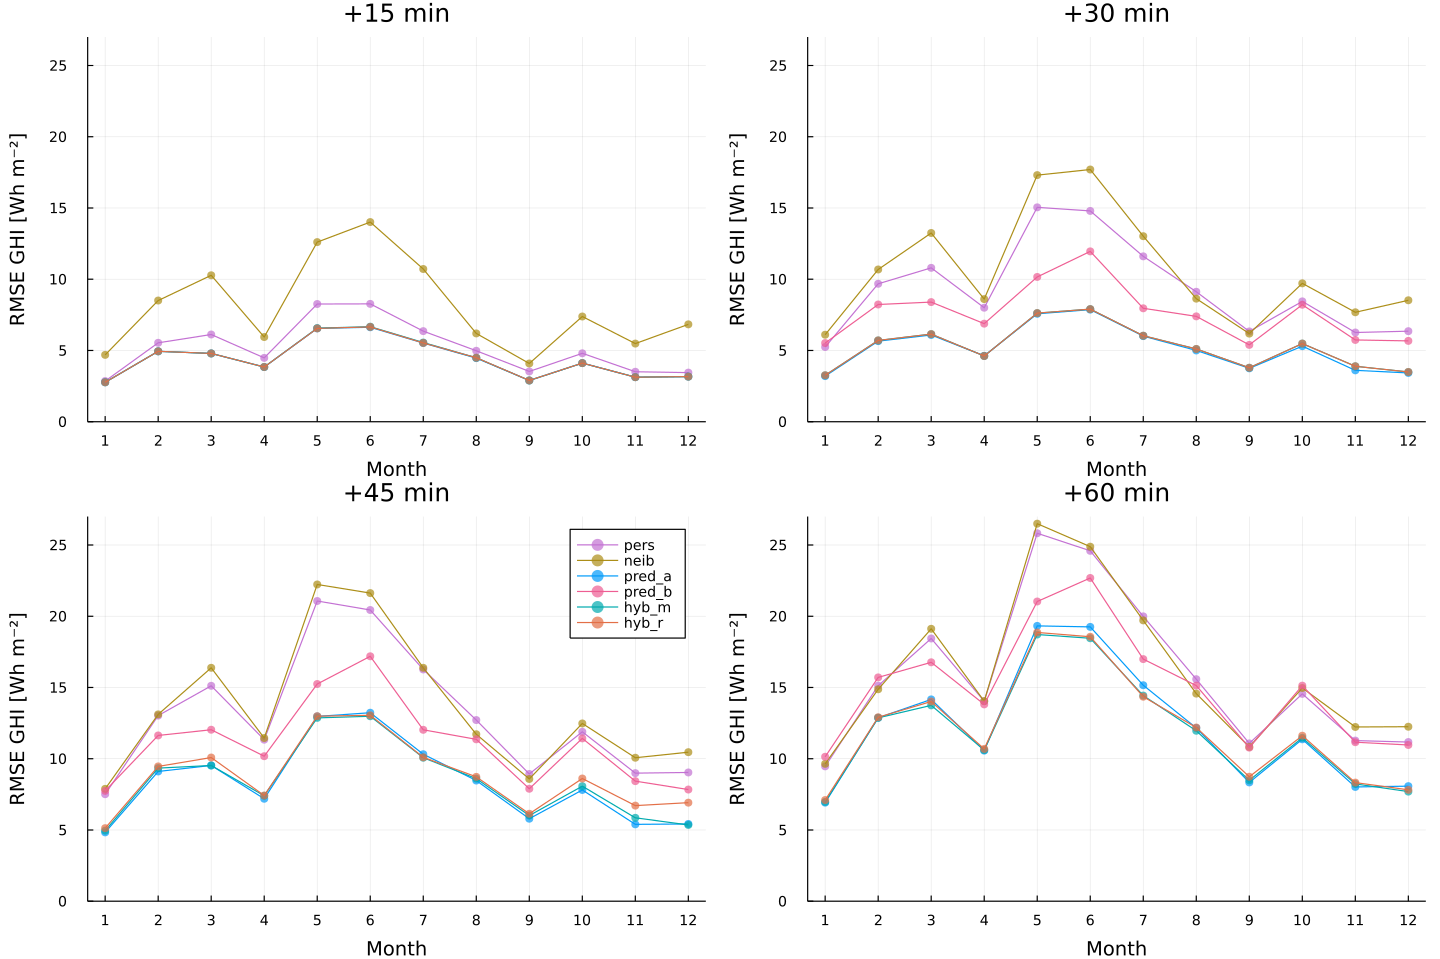

In [36]:
ps_ghi_rmse = plot(pgr1, pgr2, pgr3, pgr4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), ylim=(0,27),
    xtick=1:12, xlabel="Month", ylabel="RMSE GHI [Wh m⁻²]")

## Helsinki

In [38]:
city = "Helsinki"
tit = city*" 2020";

In [39]:
fn_city = "irradiation_Helsinki.nc"
fn_city_w  = "irradiation_Helsinki_W.nc"
fn_2020 = "irradiation2020_Helsinki.nc"
fn_2020_w  = "irradiation2020_Helsinki_W.nc";

In [40]:
test = getCMF0(fn_city; raw=1)[2]
test_neib_w = getCMF0(fn_city_w; raw=1)[2]

test2020 = getCMF1(fn_2020)
test2020_neib_w = getCMF1(fn_2020_w);

In [41]:
df01 = getDFtm(fn_city)
df02 = getDFtm(fn_2020);

In [42]:
df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)
data_train = df2_train.real

data_train_cls, binStarts, binMean = getBins(data_train, N);

### compute DFs

In [43]:
df21 = getDF(2, 1)

17638×12 DataFrame
   Row │ time                 month  ghi         ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib    dif_pred    
       │ DateTime             Int8   Float64     Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64     Float64     
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2019-01-01T08:00:00      1   1.61206     2.50372   0.643866  0.167043  0.149415  0.796363        15  -0.476823    -0.494452    0.152497
     2 │ 2019-01-01T08:15:00      1   4.2486      5.27486   0.805443  0.643866  0.639282  0.829115        20  -0.161577    -0.166162    0.0236719
     3 │ 2019-01-01T08:30:00      1   6.93655     8.26368   0.839402  0.805443  0.803799  0.826883        22  -0.033959    -0.0356031  -0.0125191
     4 │ 2019-01-01T08:45:00      1   9.58339    11.2268    0.853614  0.839402  0.838589  0.799027        22  -0.0142121   -0.0150253  -0.0545868
     5 │ 2019-01-01T09:00:00      1  10.71       14.0049    0.764735  0.853614  0.852415  0.614541        19   0.0888791    0.0876798  -0.150195
     6 │ 2019-01-01T09:15:00      1   9.11695    16.474     0.553414  0.764735  0.743371  0.343008        12   0.211321     0.189957   -0.210406
     7 │ 2019-01-01T09:30:00      1   6.48945    18.5599    0.34965   0.553414  0.535     0.293442         6   0.203764     0.18535    -0.0562075
     8 │ 2019-01-01T09:45:00      1   3.49705    20.2286    0.172877  0.34965   0.328305  0.347482         2   0.176773     0.155428    0.174606
     9 │ 2019-01-01T10:00:00      1   3.02607    21.4457    0.141104  0.172877  0.222351  0.176571         2   0.0317729    0.0812469   0.0354678
    10 │ 2019-01-01T10:15:00      1   3.05058    22.1882    0.137487  0.141104  0.234022  0.176571         2   0.00361673   0.0965348   0.0390845
    11 │ 2019-01-01T10:30:00      1   4.14334    22.4423    0.184622  0.137487  0.236073  0.249874         3  -0.0471352    0.0514506   0.0652521
   ⋮   │          ⋮             ⋮        ⋮           ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮           ⋮            ⋮
 17629 │ 2019-12-31T11:00:00     12  15.8598     22.0379    0.719659  0.850328  0.870404  0.595791        17   0.130669     0.150745   -0.123868
 17630 │ 2019-12-31T11:15:00     12  15.4268     20.8114    0.741266  0.719659  0.83691   0.73414         18  -0.0216063    0.0956442  -0.0071261
 17631 │ 2019-12-31T11:30:00     12   9.36595    19.1225    0.489788  0.741266  0.835433  0.279863        10   0.251478     0.345645   -0.209924
 17632 │ 2019-12-31T11:45:00     12   6.82302    17.0051    0.401233  0.489788  0.614221  0.391147         8   0.0885543    0.212988   -0.0100864
 17633 │ 2019-12-31T12:00:00     12   6.29219    14.5085    0.433689  0.401233  0.493094  0.462632         9  -0.0324557    0.0594053   0.0289426
 17634 │ 2019-12-31T12:15:00     12   5.85297    11.714     0.499655  0.433689  0.476854  0.570128        11  -0.0659663   -0.0228016   0.0704723
 17635 │ 2019-12-31T12:30:00     12   6.29921     8.71884   0.722482  0.499655  0.544898  0.791601        17  -0.222827    -0.177585    0.0691187
 17636 │ 2019-12-31T12:45:00     12   4.53314     5.66216   0.800603  0.722482  0.741088  0.758684        20  -0.0781205   -0.0595144  -0.0419188
 17637 │ 2019-12-31T13:00:00     12   1.78913     2.77599   0.644502  0.800603  0.801849  0.353856        15   0.1561       0.157346   -0.290646
 17638 │ 2019-12-31T13:15:00     12   0.0819138   0.491131  0.166786  0.644502  0.662858  0.318751         2   0.477716     0.496072    0.151965
                                                                                                                                 17617 rows omitted

In [44]:
df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

In [45]:
df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)

17665×12 DataFrame
   Row │ time                 month  ghi        ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred    
       │ DateTime             Int8   Float64    Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64     
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T08:00:00      1   1.60295    2.48611   0.644765  0.160627  0.144932  0.796363        15  -0.484138    -0.499833     0.151598
     2 │ 2020-01-01T08:15:00      1   4.21592    5.23615   0.805155  0.644765  0.640357  0.829115        20  -0.160391    -0.164798     0.0239596
     3 │ 2020-01-01T08:30:00      1   6.87812    8.19765   0.839035  0.805155  0.803697  0.826883        22  -0.0338798   -0.0353388   -0.0121522
     4 │ 2020-01-01T08:45:00      1   9.53066   11.1295    0.856346  0.839035  0.838348  0.816087        23  -0.0173102   -0.0179977   -0.0402581
     5 │ 2020-01-01T09:00:00      1  12.0072    13.8732    0.865495  0.856346  0.855929  0.8449          23  -0.00914967  -0.00956592  -0.0205953
     6 │ 2020-01-01T09:15:00      1  14.125     16.2496    0.869256  0.865495  0.865194  0.8449          23  -0.00376033  -0.00406196  -0.0243556
     7 │ 2020-01-01T09:30:00      1  13.7862    18.1764    0.758467  0.869256  0.869475  0.668728        18   0.110788     0.111008    -0.0897392
     8 │ 2020-01-01T09:45:00      1  10.8661    19.6925    0.55179   0.758467  0.772435  0.397047        12   0.206677     0.220645    -0.154743
     9 │ 2020-01-01T10:00:00      1   9.92178   20.7758    0.477565  0.55179   0.55783   0.430943        10   0.0742252    0.0802656   -0.0466215
    10 │ 2020-01-01T10:15:00      1   9.7352    21.3856    0.455222  0.477565  0.351455  0.476935        10   0.022343    -0.103767     0.021713
    11 │ 2020-01-01T10:30:00      1  13.668     21.5142    0.635301  0.455222  0.355751  0.651212        15  -0.180079    -0.279549     0.0159116
   ⋮   │          ⋮             ⋮        ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮
 17656 │ 2020-12-31T11:00:00     12   7.53651   21.1936    0.355603  0.459614  0.394288  0.360559         7   0.104011     0.0386848    0.00495568
 17657 │ 2020-12-31T11:15:00     12   8.85785   20.0757    0.441223  0.355603  0.400512  0.491572         9  -0.0856194   -0.0407105    0.0503498
 17658 │ 2020-12-31T11:30:00     12   5.72373   18.5044    0.309318  0.441223  0.331407  0.315711         5   0.131905     0.0220895    0.00639341
 17659 │ 2020-12-31T11:45:00     12   4.68043   16.5114    0.283467  0.309318  0.172364  0.316107         5   0.0258508   -0.111102     0.0326399
 17660 │ 2020-12-31T12:00:00     12   5.6129    14.1432    0.396862  0.283467  0.114281  0.495888         8  -0.113395    -0.28258      0.0990261
 17661 │ 2020-12-31T12:15:00     12   5.69914   11.4608    0.497271  0.396862  0.32086   0.595318        11  -0.10041     -0.176411     0.0980464
 17662 │ 2020-12-31T12:30:00     12   6.1769     8.56476   0.7212    0.497271  0.495224  0.791601        17  -0.223928    -0.225976     0.0704012
 17663 │ 2020-12-31T12:45:00     12   4.4937     5.60962   0.80107   0.7212    0.720962  0.758684        20  -0.0798703   -0.0801077   -0.0423861
 17664 │ 2020-12-31T13:00:00     12   1.8766     2.81915   0.665662  0.80107   0.802009  0.353856        15   0.135408     0.136347    -0.311806
 17665 │ 2020-12-31T13:15:00     12   0.103813   0.572584  0.181306  0.665662  0.683129  0.326943         3   0.484356     0.501823     0.145638
                                                                                                                                 17644 rows omitted

In [46]:
df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

In [47]:
df1t = hybrid(df21, df21_2020, 1)

17665×18 DataFrame
   Row │ time                 month  ghi        ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m   ⋯
       │ DateTime             Int8   Float64    Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64      Int64    Float64   Int64     Float64   Float64     ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T08:00:00      1   1.60295    2.48611   0.644765  0.160627  0.144932  0.796363        15  -0.484138    -0.499833     0.151598          0  0.160627         0  0.160627  -0.484138   ⋯
     2 │ 2020-01-01T08:15:00      1   4.21592    5.23615   0.805155  0.644765  0.640357  0.829115        20  -0.160391    -0.164798     0.0239596         3  0.829115         3  0.829115   0.0239596
     3 │ 2020-01-01T08:30:00      1   6.87812    8.19765   0.839035  0.805155  0.803697  0.826883        22  -0.0338798   -0.0353388   -0.0121522         3  0.826883         3  0.826883  -0.0121522
     4 │ 2020-01-01T08:45:00      1   9.53066   11.1295    0.856346  0.839035  0.838348  0.816087        23  -0.0173102   -0.0179977   -0.0402581         3  0.816087         1  0.839035  -0.0402581
     5 │ 2020-01-01T09:00:00      1  12.0072    13.8732    0.865495  0.856346  0.855929  0.8449          23  -0.00914967  -0.00956592  -0.0205953         3  0.8449           3  0.8449    -0.0205953  ⋯
     6 │ 2020-01-01T09:15:00      1  14.125     16.2496    0.869256  0.865495  0.865194  0.8449          23  -0.00376033  -0.00406196  -0.0243556         3  0.8449           3  0.8449    -0.0243556
     7 │ 2020-01-01T09:30:00      1  13.7862    18.1764    0.758467  0.869256  0.869475  0.668728        18   0.110788     0.111008    -0.0897392         3  0.668728         3  0.668728  -0.0897392
     8 │ 2020-01-01T09:45:00      1  10.8661    19.6925    0.55179   0.758467  0.772435  0.397047        12   0.206677     0.220645    -0.154743          3  0.397047         3  0.397047  -0.154743
     9 │ 2020-01-01T10:00:00      1   9.92178   20.7758    0.477565  0.55179   0.55783   0.430943        10   0.0742252    0.0802656   -0.0466215         3  0.430943         3  0.430943  -0.0466215  ⋯
    10 │ 2020-01-01T10:15:00      1   9.7352    21.3856    0.455222  0.477565  0.351455  0.476935        10   0.022343    -0.103767     0.021713          3  0.476935         3  0.476935   0.021713
    11 │ 2020-01-01T10:30:00      1  13.668     21.5142    0.635301  0.455222  0.355751  0.651212        15  -0.180079    -0.279549     0.0159116         3  0.651212         3  0.651212   0.0159116
   ⋮   │          ⋮             ⋮        ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮      ⋱
 17656 │ 2020-12-31T11:00:00     12   7.53651   21.1936    0.355603  0.459614  0.394288  0.360559         7   0.104011     0.0386848    0.00495568        3  0.360559         3  0.360559   0.00495568
 17657 │ 2020-12-31T11:15:00     12   8.85785   20.0757    0.441223  0.355603  0.400512  0.491572         9  -0.0856194   -0.0407105    0.0503498         3  0.491572         3  0.491572   0.0503498  ⋯
 17658 │ 2020-12-31T11:30:00     12   5.72373   18.5044    0.309318  0.441223  0.331407  0.315711         5   0.131905     0.0220895    0.00639341        3  0.315711         3  0.315711   0.00639341
 17659 │ 2020-12-31T11:45:00     12   4.68043   16.5114    0.283467  0.309318  0.172364  0.316107         5   0.0258508   -0.111102     0.0326399         3  0.316107         3  0.316107   0.0326399
 17660 │ 2020-12-31T12:00:00     12   5.6129    14.1432    0.396862  0.283467  0.114281  0.495888         8  -0.113395    -0.28258      0.0990261         3  0.495888         3  0.495888   0.09902

In [48]:
df2t = hybrid(df22, df22_2020, 2)
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

### mn ± sd 

In [49]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col3 = combine(df2t, :dif_pred_n => std => :pred_n)
append!(col3, combine(df3t, :dif_pred_n => std => :pred_n))
append!(col3, combine(df4t, :dif_pred_n => std => :pred_n))

col4 = reshape([NaN; Array(col3)], 4);

insertcols!(sds, 4, :pred_n => col4)

4×6 DataFrame
 Row │ pers      neib      pred       pred_n      hyb_r      hyb_m     
     │ Float64   Float64   Float64    Float64     Float64    Float64   
─────┼─────────────────────────────────────────────────────────────────
   1 │ 0.120961  0.127026  0.0798936  NaN         0.0796721  0.0799891
   2 │ 0.175964  0.177888  0.0778622    0.104638  0.0787856  0.0792908
   3 │ 0.198377  0.198451  0.131755     0.155423  0.127508   0.124422
   4 │ 0.213368  0.212989  0.166732     0.193078  0.151065   0.150999

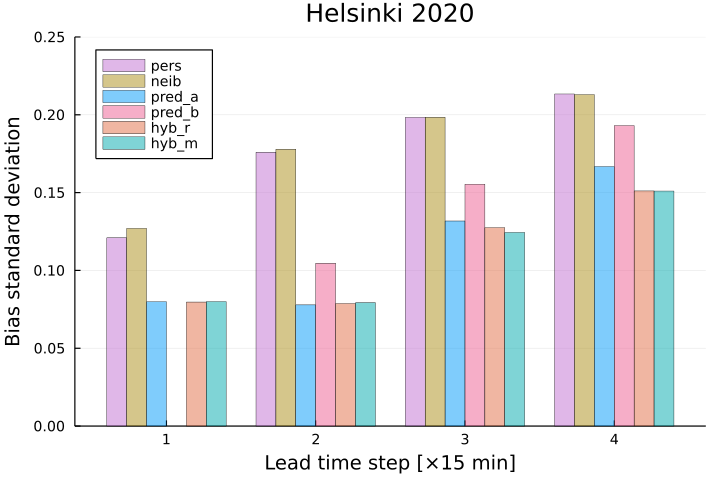

In [52]:
gb_he = groupedbar(Matrix(sds), leg=:topleft, lw=0.3, fillalpha=0.5, grid=:y,
    c=[4 5 1 7 2 6], label=["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"],
    ylim=(0, 0.25), xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=tit)

### rmse vs mae

df_err = 6×9 DataFrame
 Row │ method  mae1         mae2       mae3       mae4       rmse1        rmse2      rmse3     rmse4
     │ String  Float64      Float64    Float64    Float64    Float64      Float64    Float64   Float64
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0631253  0.0987293  0.121111   0.136129     0.120965   0.175993   0.19842   0.213414
   2 │ neib      0.0678731  0.0997402  0.120517   0.135306     0.127022   0.177892   0.198463  0.213003
   3 │ pred_a    0.0422023  0.046324   0.0774879  0.103583     0.0798924  0.0780462  0.132473  0.167393
   4 │ pred_b  NaN          0.0654189  0.10108    0.131493   NaN          0.104781   0.156058  0.194494
   5 │ hyb_m     0.041992   0.0472502  0.0762853  0.0994287    0.0799873  0.0793721  0.125231  0.151692
   6 │ hyb_r     0.0414522  0.0468419  0.0803788  0.100693     0.0797257  0.0789074  0.129494  0.152277


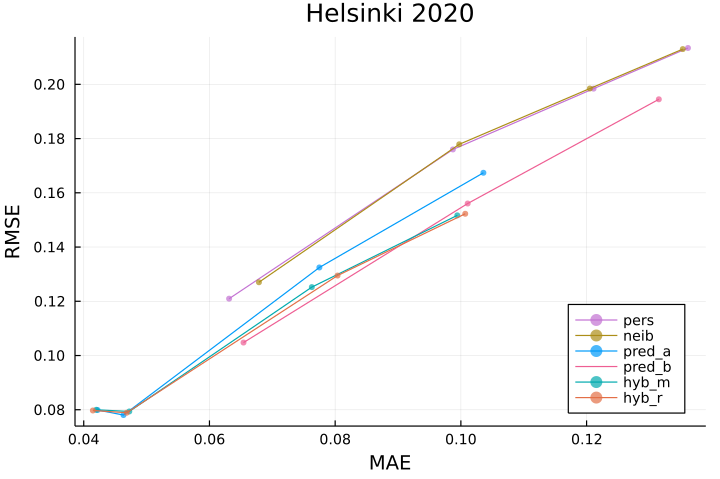

In [53]:
p_he = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=tit)

### First order difference

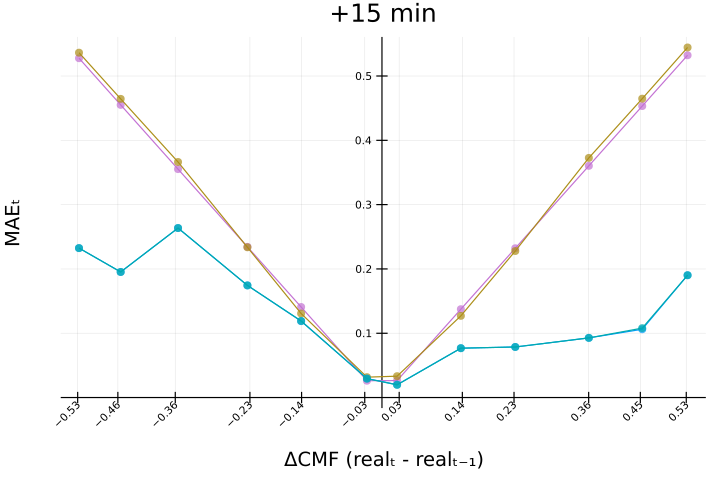

In [54]:
dif1 = viz_dif(df1t, 1)

In [55]:
dif2 = viz_dif(df2t, 2)
dif3 = viz_dif(df3t, 3)
dif4 = viz_dif(df4t, 4);

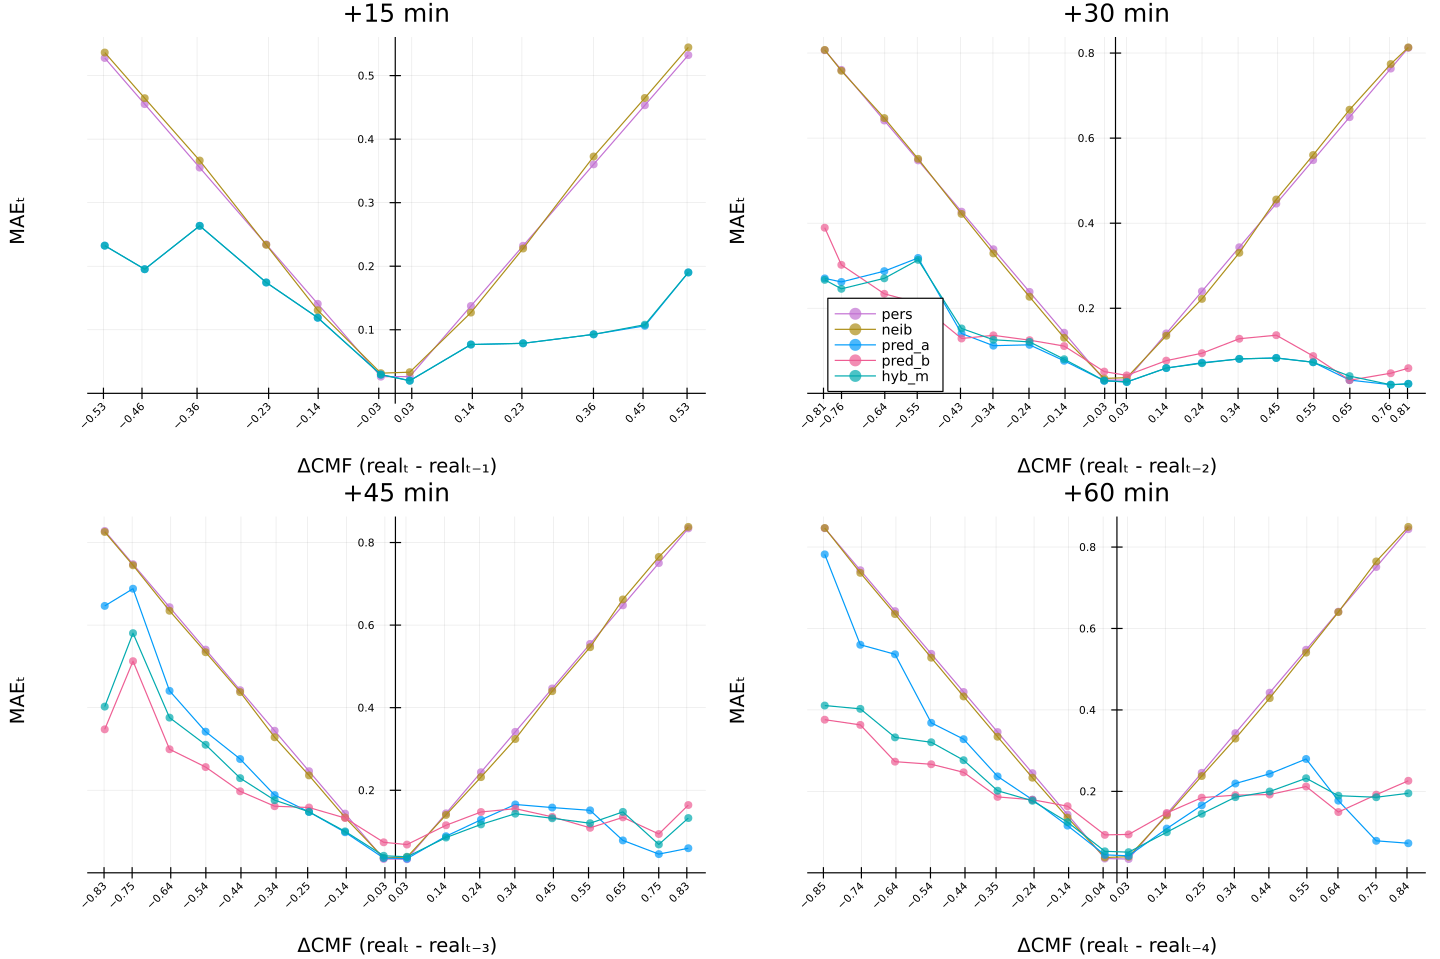

In [56]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAEₜ")

### Monthly avg

In [57]:
gb = groupby(df1t, :month)
ghi_mo = [mean(g.ghi) for g in gb]
cmf_mo = [mean(g.real) for g in gb];

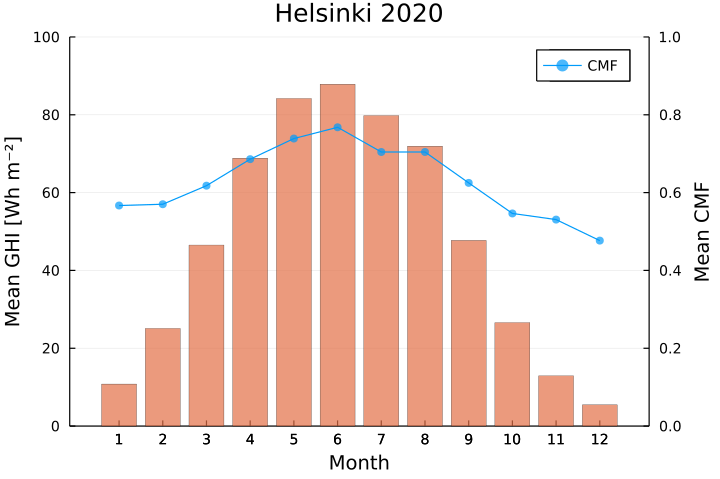

In [62]:
b_he = bar(ghi_mo, c=2, lw=0.2, fillalpha=0.7, grid=:y, right_margin=1.3cm,
    xtick=1:12, ytick=0:20:100, ylim=(0,100), 
    xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=tit)
plot!(twinx(), cmf_mo, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### GHI evaluation

In [63]:
df1g = getGHI(df1t, 1)

17665×7 DataFrame
   Row │ month  ghi        ghi_pers   ghi_neib   ghi_pred   ghi_hyb_m  ghi_hyb_r 
       │ Int8   Float64    Float64    Float64    Float64    Float64    Float64   
───────┼─────────────────────────────────────────────────────────────────────────
     1 │     1   1.60295    0.399336   0.360317   1.97984    0.399336   0.399336
     2 │     1   4.21592    3.37609    3.35301    4.34137    4.34137    4.34137
     3 │     1   6.87812    6.60038    6.58842    6.7785     6.7785     6.7785
     4 │     1   9.53066    9.338      9.33035    9.08261    9.08261    9.338
     5 │     1  12.0072    11.8802    11.8745    11.7214    11.7214    11.7214
     6 │     1  14.125     14.0639    14.059     13.7293    13.7293    13.7293
     7 │     1  13.7862    15.8       15.8039    12.1551    12.1551    12.1551
     8 │     1  10.8661    14.9361    15.2112     7.81884    7.81884    7.81884
     9 │     1   9.92178   11.4639    11.5894     8.95318    8.95318    8.95318
    10 │     1   9.7352    10.213      7.51608   10.1995    10.1995    10.1995
    11 │     1  13.668      9.79373    7.65371   14.0103    14.0103    14.0103
   ⋮   │   ⋮        ⋮          ⋮          ⋮          ⋮          ⋮          ⋮
 17656 │    12   7.53651    9.74088    8.35638    7.64154    7.64154    7.64154
 17657 │    12   8.85785    7.13898    8.04056    9.86866    9.86866    9.86866
 17658 │    12   5.72373    8.16456    6.13249    5.84204    5.84204    5.84204
 17659 │    12   4.68043    5.10727    2.84598    5.21936    5.21936    5.21936
 17660 │    12   5.6129     4.00913    1.61631    7.01345    7.01345    7.01345
 17661 │    12   5.69914    4.54836    3.67733    6.82284    6.82284    6.82284
 17662 │    12   6.1769     4.25901    4.24148    6.77987    6.77987    6.77987
 17663 │    12   4.4937     4.04566    4.04433    4.25593    4.25593    4.25593
 17664 │    12   1.8766     2.25834    2.26098    0.997574   0.997574   0.997574
 17665 │    12   0.103813   0.381147   0.391149   0.187203   0.187203   0.187203
                                                               17644 rows omitted

In [64]:
df2g = getGHI(df2t, 2)
df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

#### MAE

In [66]:
pg1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min")

pg2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min")
pg3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min")
pg4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min")

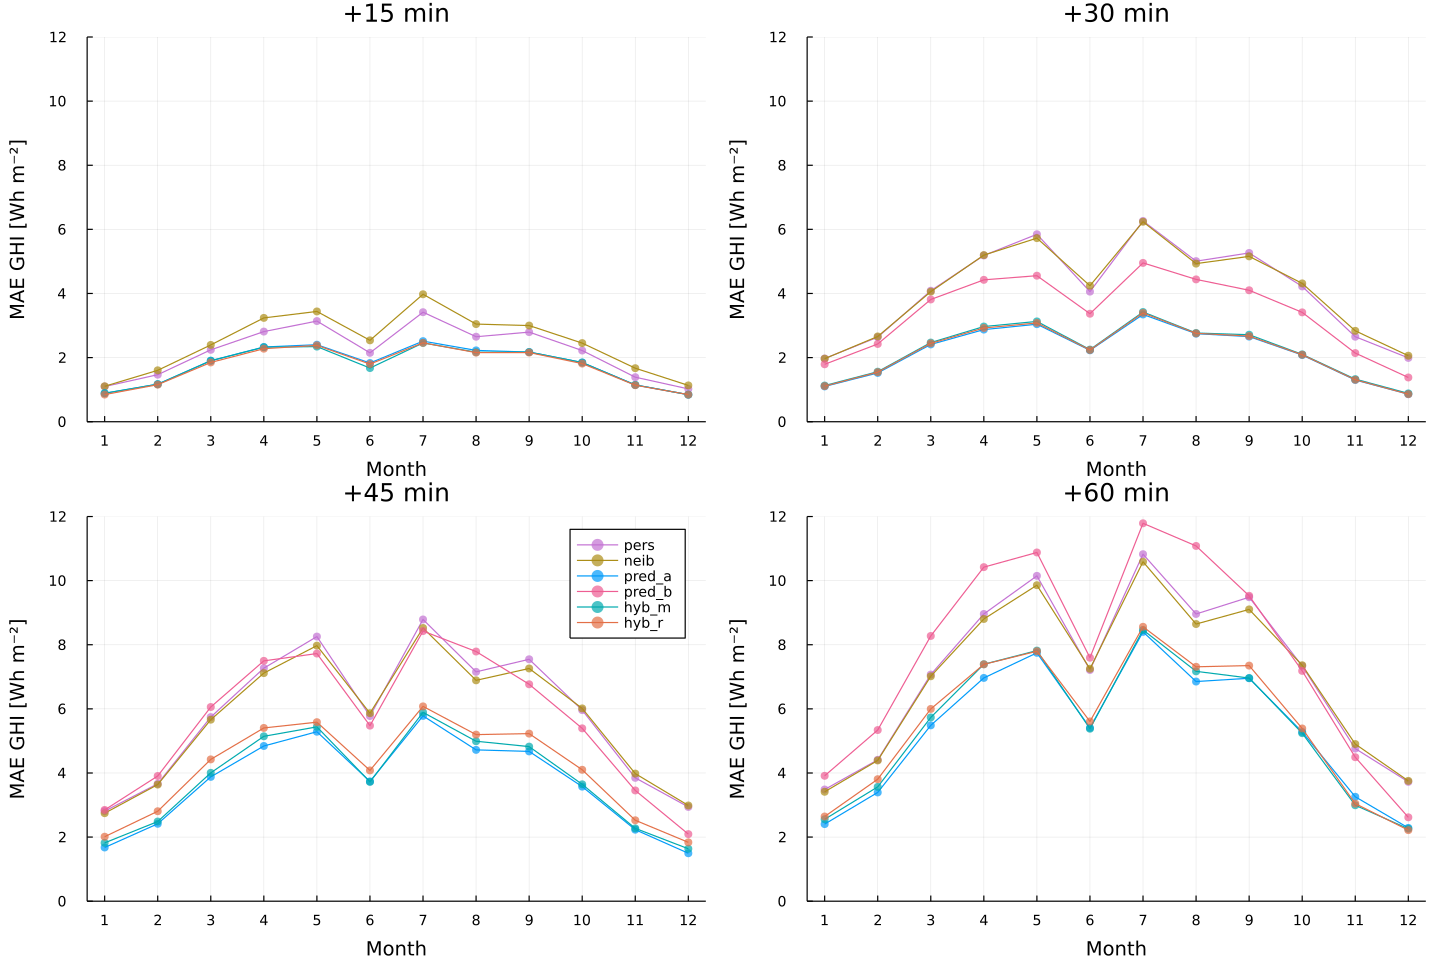

In [67]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), ylim=(0,12), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

#### RMSE

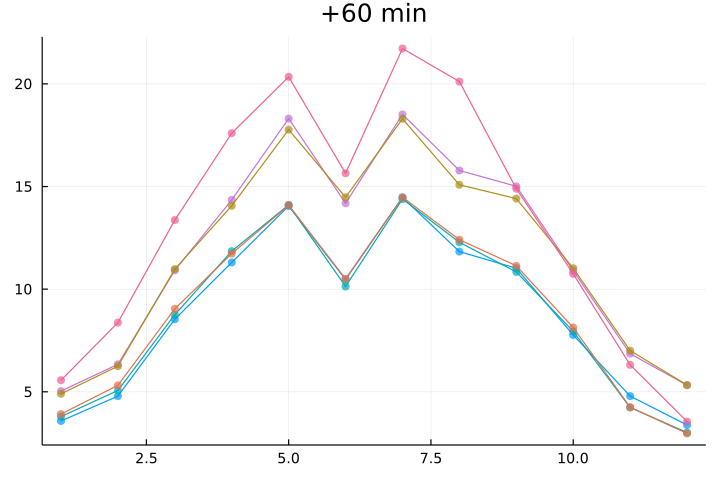

In [68]:
pgr1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min", err="rmse")

pgr2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min", err="rmse")
pgr3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min", err="rmse")
pgr4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min", err="rmse")

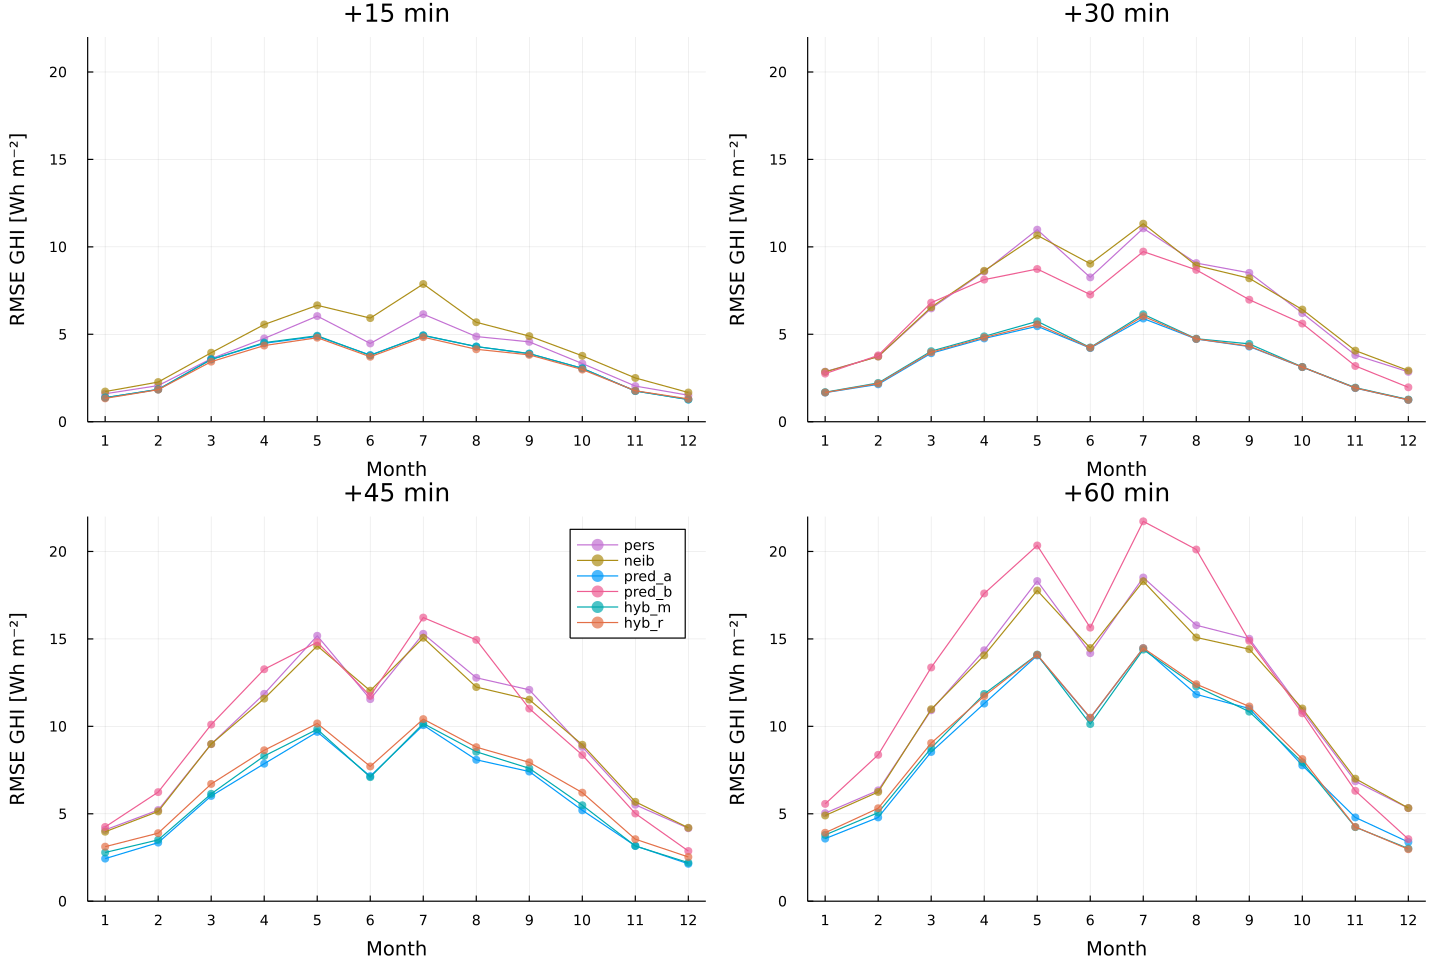

In [69]:
ps_ghi_rmse = plot(pgr1, pgr2, pgr3, pgr4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), ylim=(0,22),
    xtick=1:12, xlabel="Month", ylabel="RMSE GHI [Wh m⁻²]")